# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

#### Background

US Universities require students to take either SAT or ACT and submit their scores to prospective universities. SAT faced strong competition from ACT. Responding to this challenge situation, a new format for the SAT was released in March 2016. Our teams track statewide participation and report possible recommendations for improvements.

#### Problem
For years, Student in State North Dakota appears to have very low SAT participate rate and high ACT participate rate. The organization would like to find the possibles ways to work with in order to increase the participation rate in North Dakota.

#### Target Audience 
Non Technical executives from Marketing, adminstration, and senior managerment will join the discussion.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)
- [References](#references)


**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#import all the libraries
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the [sat_2017.csv](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/) and [act_2017.csv](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows) files and assign them to appropriately named pandas dataframes.

In [2]:
#read the csv file from relative path
sat_2017 = pd.read_csv('data/sat_2017.csv')
act_2017 = pd.read_csv('data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#show the first 10 row for dataframe sat_2017
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
#show the first 10 row for dataframe act_2017
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Dataset sat_2017 provide the information of SAT participation rates, SAT average section scores and SAT Average sum of section scores from 51 US states in 2017.
Dataset act_2017 provide the information of ACT participation rates, ACT average section scores and ACT Average composite scores from 51 US states in 2017.


#### 4a. Does the data look complete? 

Yes.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: For SAT,  each subjects section is scored from 200(min) to 800(max) points, the total score is the sum of the section scores, so it ranges from 400(min) to 1600(min). For ACT,each section score ranging between 1(min)-36(min), and averaged sections score together to create a composite score should also have a range between 1(min)-36(min)

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

There is no observed errors. Except for the State name: National is weird.

#### 5. What are your data types? 
Display the data types of each feature. 

In [5]:
#display the data types for each feature in dataframe sat_2017
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [6]:
#display the data types for each feature in dataframe sat_2017
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: Yes. For column: Composite, the datatypes should be float insead of object.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [7]:
def convert_percentage(x):
    x=int(x.replace("%",""))# replace all "%" in x with "" and convert to int
    return x# funtion return to x value
act_2017['Participation'] = act_2017['Participation'].map(convert_percentage)#map the conver_percentage funtion to "Participation"cloum in act_2017
sat_2017['Participation'] = sat_2017['Participation'].map(convert_percentage)#map the conver_percentage funtion to "Participation"cloum in sat_2017

- Fix any individual values preventing other columns from being the appropriate type.

In [8]:
act_2017['Composite'] = act_2017['Composite'].str.replace('x','')#replace the unwanted str "x" with "" for column "composite" in act_2017

- Finish your data modifications by making sure the columns are now typed appropriately.

In [9]:
act_2017['Composite'] = act_2017['Composite'].astype(float).round(1)#convert to float with 1 dec

- Display the data types again to confirm they are correct.

In [10]:
sat_2017.dtypes#check the data type again for sat_2017

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [11]:
act_2017.dtypes#check the data type again act_2017

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [12]:
sat_2017.columns = ["state","sat_participation_percentage_2017","sat_evidence_based_reading_and_Writing_2017","sat_math_2017","sat_total_2017"]
#rename the sat_2017 columns name

In [13]:
sat_2017.head()#check the outcome

,state,sat_participation_percentage_2017,sat_evidence_based_reading_and_Writing_2017,sat_math_2017,sat_total_2017
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


In [14]:
act_2017.columns = ["state","act_participation_percentage_2017","act_english_2017","act_math_2017","act_reading_2017","act_science_2017","act_composite_2017"]
#rename act_2017 columns

In [15]:
act_2017.head()
#check the outcome

,state,act_participation_percentage_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


In [16]:
my_data_dict_2017={} # creat a dict

In [17]:
my_data_dict_2017["feature"]=["state","sat_participation_percentage_2017","sat_evidence_based_reading_and_Writing_2017","sat_math_2017","sat_total_2017","state","act_participation_percentage_2017","act_english_2017","act_math_2017","act_reading_2017","act_science_2017","act_composite_2017"]
#assign the dict key and values

In [18]:
my_data_dict_2017["type"]=["object","int","int","int","int","object","int","float",'float','float','float','float']
#assign the dict key and values

In [19]:
my_data_dict_2017["dataset"]=["SAT_2017","SAT_2017","SAT_2017","SAT_2017","SAT_2017","ACT_2017","ACT_2017","ACT_2017","ACT_2017","ACT_2017","ACT_2017","ACT_2017"]
#assign the dict key and values

In [20]:
my_data_dict_2017["description"]=["The State name in USA","The percentage of students took the SAT test for different states in 2017","Average SAT ERW Section Score for participated students in different states in 2017","Average SAT Math Section Score for participated students in different states in 2017","Average SAT Total Section Score for participated students in different states in 2017","The State name in USA","The percentage of students took the ACT test for different states in 2017","Average ACT English Writing Section Score for participated students in different states in 2017","Average ACT math Section Score for participated students in different states in 2017","Average ACT reading Section Score for participated students in different states in 2017","Average ACT science Section Score for participated students in different states in 2017","Average ACT composite Section Score for participated students in different states in 2017: composite score is the average score for all the section scores"]
#assign the dict key and values

In [21]:
my_data_dict_2017=pd.DataFrame(my_data_dict_2017)
#convert the dict to dataframe

In [22]:
print (my_data_dict_2017.to_markdown())# convert the dataframe to markdown and print the result

|    | feature                                     | type   | dataset   | description                                                                                                                                                |
|---:|:--------------------------------------------|:-------|:----------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | state                                       | object | SAT_2017  | The State name in USA                                                                                                                                      |
|  1 | sat_participation_percentage_2017           | int    | SAT_2017  | The percentage of students took the SAT test for different states in 2017                                                                                  |
|  2 | sat_evidence_based_reading_and_Writing_2017 | int    | SAT_2017  | Av

| feature                                     | type   | dataset   | description                                                                                                                                                |
|:--------------------------------------------|:-------|:----------|:----------------------------------------------------------------------------------------------------------------------------------------------------------|
| state                                       | object | SAT_2017  | The State name in USA                                                                                                                                      |
| sat_participation_percentage_2017           | int    | SAT_2017  | The percentage of students took the SAT test for different states in 2017                                                                                  |
| sat_evidence_based_reading_and_Writing_2017 | int    | SAT_2017  | Average SAT ERW Section Score for participated students in different states in 2017                                                                        |
| sat_math_2017                               | int    | SAT_2017  | Average SAT Math Section Score for participated students in different states in 2017                                                                       |
| sat_total_2017                              | int    | SAT_2017  | Average SAT Total Section Score for participated students in different states in 2017                                                                      |
| state                                       | object | ACT_2017  | The State name in USA                                                                                                                                      |
| act_participation_percentage_2017           | int    | ACT_2017  | The percentage of students took the ACT test for different states in 2017                                                                                  |
| act_english_2017                            | float  | ACT_2017  | Average ACT English Writing Section Score for participated students in different states in 2017                                                            |
| act_math_2017                               | float  | ACT_2017  | Average ACT math Section Score for participated students in different states in 2017                                                                       |
| act_reading_2017                            | float  | ACT_2017  | Average ACT reading Section Score for participated students in different states in 2017                                                                    |
| act_science_2017                            | float  | ACT_2017  | Average ACT science Section Score for participated students in different states in 2017                                                                    |
| act_composite_2017                          | float  | ACT_2017  | Average ACT composite Section Score for participated students in different states in 2017: composite score is the average score for all the section scores |

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [23]:
act_2017.isnull().values.any()#check any NAN values in act_2017

False

In [24]:
sat_2017.isnull().values.any()#check any Nan values in sat_2017

False

In [25]:
act_2017.shape#check the shape of act_2017

(52, 7)

In [26]:
sat_2017.shape#check the shape of sat_2017

(51, 5)

In [27]:
act_2017.duplicated(subset=None, keep='first').sum()#check any duplicated line 

0

In [28]:
act_2017=act_2017[act_2017['state'].isin(sat_2017["state"])]#remove the extra line

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [29]:
combined_2017 = pd.merge(sat_2017, act_2017, how='outer') #outer merge sat_2017 and act_2018

In [30]:
combined_2017.isnull().values.any()#check any Nan values

False

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [31]:
combined_2017.to_csv('data/combined_2017.csv', index=False)#save the file to combined_2017

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

#### 1. Read In 2018 SAT & ACT  Data

Read in the [act_2018_updated.csv](https://reports.collegeboard.org/sat-suite-program-results/state-results) and [sat_2018.csv](http://www.act.org/content/dam/act/unsecured/documents/cccr2018/Average-Scores-by-State.pdf) files and assign them to appropriately named pandas dataframes.

In [32]:
#read the file form relative path
sat_2018 = pd.read_csv('data/sat_2018.csv')
act_2018 = pd.read_csv('data/act_2018_updated.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to have a general view of the data, to find out if the data is a compele data, or has any errors.

In [33]:
sat_2018.head(10)#show the first 10 shows of the data

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076
5,Colorado,100%,519,506,1025
6,Connecticut,100%,535,519,1053
7,Delaware,100%,505,492,998
8,District of Columbia,92%,497,480,977
9,Florida,56%,550,549,1099


In [34]:
act_2018.head(10)#show first 10 shows of the data

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1
5,Colorado,30,23.9,23.9,23.2,24.4,23.5
6,Connecticut,26,25.6,26.0,24.8,26.1,24.9
7,Delaware,17,23.2,23.7,23.1,24.5,23.4
8,District of Columbia,32,23.6,23.7,22.7,24.4,23.0
9,Florida,66,19.9,19.2,19.3,21.1,19.5


#### 3. What are your data types? 
Display the data types of each feature to idetify any odd or incorrect data types for further analysis

In [35]:
sat_2018.dtypes#check the data type

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [36]:
act_2018.dtypes#check the data type

State                             object
Percentage of Students Tested      int64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

#### 4. Fix Incorrect Data Types

In [37]:
sat_2018['Participation'] = sat_2018['Participation'].map(convert_percentage)#remove "%" from the column"Participation"

In [38]:
sat_2018.dtypes#check the data types again

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [39]:
act_2018.dtypes#check the data types again

State                             object
Percentage of Students Tested      int64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

#### 5. Rename Columns

Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns

In [40]:
sat_2018.columns = ["state","sat_participation_percentage_2018","sat_evidence_based_reading_and_Writing_2018","sat_math_2018","sat_total_2018"]
#rename the columns

In [41]:
act_2018.columns = ["state","act_participation_percentage_2018","act_composite_2018","act_english_2018","act_math_2018","act_reading_2018","act_science_2018"]
#rename the columns

#### 6. Add the information into  a data dictionary to provides a quick overview of columns, alongside data types and descriptions. 

| feature                                     | type   | dataset   | description                                                                                                                                                |
|:--------------------------------------------|:-------|:----------|:----------------------------------------------------------------------------------------------------------------------------------------------------------|
| state                                       | object | SAT_2017/8| The State name in USA                                                                                                                                      |
| sat_participation_percentage_2017           | int    | SAT_2017  | The percentage of students took the SAT test for different states in 2017                                                                                  |
| sat_evidence_based_reading_and_Writing_2017 | int    | SAT_2017  | Average SAT ERW Section Score for participated students in different states in 2017                                                                        |
| sat_math_2017                               | int    | SAT_2017  | Average SAT Math Section Score for participated students in different states in 2017                                                                       |
| sat_total_2017                              | int    | SAT_2017  | Average SAT Total Section Score for participated students in different states in 2017                                                                      |
| act_participation_percentage_2017           | int    | ACT_2017  | The percentage of students took the ACT test for different states in 2017                                                                                  |
| act_english_2017                            | float  | ACT_2017  | Average ACT English Writing Section Score for participated students in different states in 2017                                                            |
| act_math_2017                               | float  | ACT_2017  | Average ACT math Section Score for participated students in different states in 2017                                                                       |
| act_reading_2017                            | float  | ACT_2017  | Average ACT reading Section Score for participated students in different states in 2017                                                                    |
| act_science_2017                            | float  | ACT_2017  | Average ACT science Section Score for participated students in different states in 2017                                                                    |
| act_composite_2017                          | float  | ACT_2017  | Average ACT composite Section Score for participated students in different states in 2017: composite score is the average score for all the section scores |
| sat_participation_percentage_2018           | int    | SAT_2018  | The percentage of students took the SAT test for different states in 2018                                                                                  |
| sat_evidence_based_reading_and_Writing_2018 | int    | SAT_2018  | Average SAT ERW Section Score for participated students in different states in 2018                                                                        |
| sat_math_2018                               | int    | SAT_2018  | Average SAT Math Section Score for participated students in different states in 2018                                                                       |
| sat_total_2018                              | int    | SAT_2018  | Average SAT Total Section Score for participated students in different states in 2018                                                                      |
| act_participation_percentage_2018           | int    | ACT_2018  | The percentage of students took the ACT test for different states in 2018                                                                                  |
| act_english_2018                            | float  | ACT_2018  | Average ACT English Writing Section Score for participated students in different states in 2018                                                            |
| act_math_2018                               | float  | ACT_2018  | Average ACT math Section Score for participated students in different states in 2018                                                                       |
| act_reading_2018                            | float  | ACT_2018  | Average ACT reading Section Score for participated students in different states in 2018                                                                    |
| act_science_2018                            | float  | ACT_2018  | Average ACT science Section Score for participated students in different states in 2018                                                                    |
| act_composite_2018                          | float  | ACT_2018  | Average ACT composite Section Score for participated students in different states in 2018: composite score is the average score for all the section scores |

#### 7. Find empty input or duplication/unnecessary rows

In [42]:
act_2018.isnull().values.any() #check the Nan values

False

In [43]:
sat_2018.isnull().values.any()#check any Nan vlaues

False

In [44]:
sat_2018.shape#check the shapes

(51, 5)

In [45]:
act_2018.shape#check the shapes

(51, 7)

In [46]:
act_2018=act_2018[act_2018['state'].isin(sat_2018["state"])]#remove the extra rows which is not match with Sat_2018 "state"

#### 8. Merge Dataframes

Join the 2018 ACT and SAT dataframes using the state in each dataframe as the key

In [47]:
combined_2018 = pd.merge(sat_2018, act_2018, how='outer')# Outer merge the two dataframe

In [48]:
combined_2018.isnull().values.any()#check any Nan values in the dataframe

False

#### 9. Save the cleaned, merged dataframe

Use a relative path to save out the data as `combined_2018.csv`

In [49]:
combined_2018.to_csv('data/combined_2018.csv', index=False)#save it to combined_2018.csv

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

#### 1. check any error within combined_2018 and combined_2017

In [50]:
combined_2018=combined_2018[combined_2018['state'].isin(combined_2017["state"])]#remove the extra rows if it is not match with combine_2017

In [51]:
combined_2018.shape#check the shape

(51, 11)

In [52]:
combined_2017.shape#check the shape

(51, 11)

In [53]:
#check the if the columns name only contains identical name
identical_name=[]#creat a list
for i in list(combined_2017.columns): # check every columns in combined_2017
    if i in list(combined_2018.columns):#check if every columns have a name is same as combined_2018
        identical_name.append(i)# add this column name to the list just created
identical_name#check the list content

['state']

#### 2. Combine your 2017 and 2018 data into a single dataframe

In [54]:
final = pd.merge(combined_2017, combined_2018, how='outer')#merge combined_2017 and combined_2018

In [55]:
final.isnull().values.any()#check if the final list contain any Nan values

False

#### 3. Save the contents of this merged dataframe as final.csv

In [56]:
final.to_csv('data/final.csv', index=False)#save the dataframe to final.csv

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [57]:
final.describe()#creat a quick overview of each variables'statistic summary

,sat_participation_percentage_2017,sat_evidence_based_reading_and_Writing_2017,sat_math_2017,sat_total_2017,act_participation_percentage_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_percentage_2018,sat_evidence_based_reading_and_Writing_2018,sat_math_2018,sat_total_2018,act_participation_percentage_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,547.627451,1126.098039,65.254902,20.931373,21.182353,22.013725,21.041176,21.519608,45.745098,563.686275,556.235294,1120.019608,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,35.276632,45.666901,84.909119,92.494812,32.140842,2.353677,1.981989,2.067271,3.182463,2.020695,37.314256,47.502627,47.772623,94.155083,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,2.000000,482.000000,52.000000,950.000000,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000,2.000000,480.000000,480.000000,977.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,4.000000,533.500000,522.000000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.900000,19.800000,4.500000,534.500000,522.500000,1057.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,52.000000,552.000000,544.000000,1098.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,22.750000,23.600000,77.500000,610.500000,593.500000,1204.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [58]:
def stv(columns):
    u=final[columns].mean()# u is the mean of the column
    n=final[columns].count()#n is the count of the column
    x=list(final[columns])# x is a list of the column data
    t=[]#creat a empty list
    for i in range(len(x)):
         t.append((x[i]-u)**2) #add caculate result to t
    return math.sqrt(sum(t)/n)#return to the final calculate result according to the formular

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [59]:
#use funtion created in previous step to calculate the standard deviation
sd={columns: stv(columns) for columns in list(final.columns)[1:]}#creat a dict with the key is the column name , and the value is their standard deviation.
sd

{'sat_participation_percentage_2017': 34.92907076664508,
 'sat_evidence_based_reading_and_Writing_2017': 45.21697020437866,
 'sat_math_2017': 84.07255521608297,
 'sat_total_2017': 91.58351056778743,
 'act_participation_percentage_2017': 31.824175751231806,
 'act_english_2017': 2.3304876369363363,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.0469029314842646,
 'act_science_2017': 3.151107895464408,
 'act_composite_2017': 2.000786081581989,
 'sat_participation_percentage_2018': 36.946619223539415,
 'sat_evidence_based_reading_and_Writing_2018': 47.03460978357609,
 'sat_math_2018': 47.30194550378352,
 'sat_total_2018': 93.22742384464433,
 'act_participation_percentage_2018': 33.745194881997506,
 'act_composite_2018': 2.0855261815801147,
 'act_english_2018': 2.4222536143202795,
 'act_math_2018': 2.015707255555717,
 'act_reading_2018': 2.145891884510421,
 'act_science_2018': 1.8516885484833543}

In [60]:
#use numpy's std funtion to calculate the standard deviation
sd1={columns:np.std(final[columns].values, axis=0, ddof=0)for columns in list(final.columns)[1:]}
sd1

{'sat_participation_percentage_2017': 34.929070766645076,
 'sat_evidence_based_reading_and_Writing_2017': 45.21697020437866,
 'sat_math_2017': 84.07255521608297,
 'sat_total_2017': 91.58351056778743,
 'act_participation_percentage_2017': 31.824175751231806,
 'act_english_2017': 2.3304876369363368,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.046902931484265,
 'act_science_2017': 3.151107895464408,
 'act_composite_2017': 2.0007860815819893,
 'sat_participation_percentage_2018': 36.946619223539415,
 'sat_evidence_based_reading_and_Writing_2018': 47.03460978357609,
 'sat_math_2018': 47.301945503783536,
 'sat_total_2018': 93.22742384464432,
 'act_participation_percentage_2018': 33.745194881997506,
 'act_composite_2018': 2.0855261815801143,
 'act_english_2018': 2.4222536143202795,
 'act_math_2018': 2.0157072555557174,
 'act_reading_2018': 2.1458918845104216,
 'act_science_2018': 1.8516885484833538}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

##### For manually calculated standard deviation, it is close to the output from pandas.describe, but not exactly the same with each other. for numpy's std method , it matches up with the manually calculated standard deviation.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [61]:
final.sort_values('sat_participation_percentage_2017', ascending=False)[["state","sat_participation_percentage_2017"]].head()
#sort the"state" by "sat_participation_percentage_2017" from high to low, and display the first 5 row

,state,sat_participation_percentage_2017
8,District of Columbia,100
22,Michigan,100
6,Connecticut,100
7,Delaware,100
29,New Hampshire,96


In [62]:
final.sort_values('sat_participation_percentage_2017')[["state","sat_participation_percentage_2017"]].head()
#sort the"state" by "sat_participation_percentage_2017" from low to high, and display the first 5 row

,state,sat_participation_percentage_2017
34,North Dakota,2
24,Mississippi,2
15,Iowa,2
25,Missouri,3
44,Utah,3


##### For 2017 SAT, states:District of columbia, Michigan, connecticut, Delaware have the highest participation rates, while state: North Dakota, Mississippi, Lowa have the lowerst participation rates 

In [63]:
final.sort_values('sat_participation_percentage_2018',ascending=False)[["state","sat_participation_percentage_2018"]].head()
#sort the"state" by "sat_participation_percentage_2018" from high to low, and display the first 5 row

,state,sat_participation_percentage_2018
5,Colorado,100
6,Connecticut,100
7,Delaware,100
22,Michigan,100
12,Idaho,100


In [64]:
final.sort_values('sat_participation_percentage_2018')[["state","sat_participation_percentage_2018"]].head()
#sort the"state" by "sat_participation_percentage_2018" from low to high, and display the first 5 row

,state,sat_participation_percentage_2018
34,North Dakota,2
50,Wyoming,3
41,South Dakota,3
27,Nebraska,3
49,Wisconsin,3


##### For 2018 SAT, states: District of Colorado, Michigan, Connecticut, Delaware, Idaho have the highest participation rates, while state: North Dakota have the lowerst participation rates 

In [65]:
final.sort_values('act_participation_percentage_2017',ascending=False)[["state","act_participation_percentage_2017"]].head()
#sort the"state" by "act_participation_percentage_2017" from high to low, and display the first 5 row

,state,act_participation_percentage_2017
0,Alabama,100
17,Kentucky,100
49,Wisconsin,100
44,Utah,100
42,Tennessee,100


In [66]:
final.sort_values('act_participation_percentage_2017')[["state","act_participation_percentage_2017"]].head()
#sort the"state" by "act_participation_percentage_2017" from low to high, and display the first 5 row

,state,act_participation_percentage_2017
19,Maine,8
29,New Hampshire,18
7,Delaware,18
39,Rhode Island,21
38,Pennsylvania,23


##### For 2017 ACT, states: Alabama, Kentucky, Wisconsin, Utach, Tennessee have the highest participation rates, while state: Maine have the lowerst participation rates 

In [67]:
final.sort_values('act_participation_percentage_2018',ascending=False)[["state","act_participation_percentage_2018"]].head()
#sort the"state" by "act_participation_percentage_2018" from high to low, and display the first 5 row

,state,act_participation_percentage_2018
0,Alabama,100
17,Kentucky,100
49,Wisconsin,100
44,Utah,100
42,Tennessee,100


In [68]:
final.sort_values('act_participation_percentage_2018')[["state","act_participation_percentage_2018"]].head()
#sort the"state" by "act_participation_percentage_2018" from low to high, and display the first 5 row

,state,act_participation_percentage_2018
19,Maine,7
39,Rhode Island,15
29,New Hampshire,16
7,Delaware,17
38,Pennsylvania,20


##### For 2018 ACT, states: Alabama, Kentucky, Wisconsin, Utach, Tennessee have the highest participation rates, while state: Maine have the lowerst participation rates 

In [69]:
final.sort_values('sat_total_2017',ascending=False)[["state","sat_total_2017"]].head()
#sort the"state" by "sat_total_2017" from high to low, and display the first 5 row

,state,sat_total_2017
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260


In [70]:
final.sort_values('sat_total_2017')[["state","sat_total_2017"]].head()
#sort the"state" by "sat_total_2017" from low to high, and display the first 5 row

,state,sat_total_2017
8,District of Columbia,950
7,Delaware,996
12,Idaho,1005
22,Michigan,1005
19,Maine,1012


##### For 2017 SAT, states: Minnesota have the highest average total score, while state: District of Columbia have the lowerst average total score 

In [71]:
final.sort_values('sat_total_2018',ascending=False)[["state","sat_total_2018"]].head()
#sort the"state" by "sat_total_2018" from high to low, and display the first 5 row

,state,sat_total_2018
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
15,Iowa,1265
16,Kansas,1265


In [72]:
final.sort_values('sat_total_2018')[["state","sat_total_2018"]].head()
#sort the"state" by "sat_total_2018" from low to high, and display the first 5 row

,state,sat_total_2018
8,District of Columbia,977
7,Delaware,998
48,West Virginia,999
12,Idaho,1001
44,Utah,1010


##### For 2018 SAT, states: Minnesota have the highest average total score, while state: District of Columbia have the lowerst average total score 

In [73]:
final.sort_values('act_composite_2017',ascending=False)[["state","act_composite_2017"]].head()
#sort the"state" by "act_composite_2017" from high to low, and display the first 5 row

,state,act_composite_2017
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


In [74]:
final.sort_values('act_composite_2017')[["state","act_composite_2017"]].head()
#sort the"state" by "act_composite_2017" from low to high, and display the first 5 row

,state,act_composite_2017
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1


##### For 2017 ACT, states: New Hampshire have the highest average total score, while state: Nevada have the lowerst average total score 

In [75]:
final.sort_values('act_composite_2018',ascending=False)[["state","act_composite_2018"]].head()
#sort the"state" by "act_composite_2018" from high to low, and display the first 5 row

,state,act_composite_2018
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4


In [76]:
final.sort_values('act_composite_2018')[["state","act_composite_2018"]].head()
#sort the"state" by "act_composite_2018" from low to high, and display the first 5 row

,state,act_composite_2018
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1


##### For 2018 ACT, states: Connecticut have the highest average total score, while state: Nevada have the lowerst average total score 

In [77]:
final["state"][(final["sat_participation_percentage_2017"]==100) & (final["sat_participation_percentage_2018"]!=100) ]
#find any state have 100 percent sat participation rate in 2017 but not in 2018

8    District of Columbia
Name: state, dtype: object

In [78]:
final["state"][(final["sat_participation_percentage_2017"]!=100) & (final["sat_participation_percentage_2018"]==100) ]
#find any state have 100 sat percent participation rate in 2018 but not in 2017

5     Colorado
12       Idaho
Name: state, dtype: object

#####  From 2017 to 2018, Columbia pacitipation rate decreased from 100%, while Colorado and Idaho are  increased to 100%

In [79]:
final["state"][(final["act_participation_percentage_2017"]==100) & (final["act_participation_percentage_2018"]!=100)]
#find any state have 100 percent ACT participation rate in 2017 but not in 2018

5      Colorado
23    Minnesota
Name: state, dtype: object

In [80]:
final["state"][(final["act_participation_percentage_2018"]==100) & (final["act_participation_percentage_2017"]!=100)]
#find any state have 100 percent ACT participation rate in 2018 but not in 2017

27    Nebraska
35        Ohio
Name: state, dtype: object

##### From 2017 to 2018Ohio and Nebraska participation rate increased to 100% ;Colorado and minnesota deceased from 100%

### Colorado is a interesting state. It seems to have a big switch from taking ACT to taking SAT in 2018

In [81]:
final["state"][(final["sat_participation_percentage_2017"]>50) & (final["act_participation_percentage_2017"]>50)]
#find any state have more than 50 percent participation rate for both SAT and ACT in 2017

9     Florida
10    Georgia
11     Hawaii
Name: state, dtype: object

In [82]:
final["state"][(final["sat_participation_percentage_2018"]>50) & (final["act_participation_percentage_2018"]>50)]
#find any state have more than 50 percent participation rate for both SAT and ACT in 2018

9            Florida
10           Georgia
11            Hawaii
33    North Carolina
40    South Carolina
Name: state, dtype: object

#### From 2017 to 2018, State: Florida, Georgia and Hawaii remain more than 50% participation rate on both year, State: North Carolina and South Carolina shows more than 50% participation rate in 2018

### North Carolina, and South Carolina are interesting states, They shows student switch to a trend of taking both tests 

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

Text(123.99999999999999, 0.5, 'Columns')

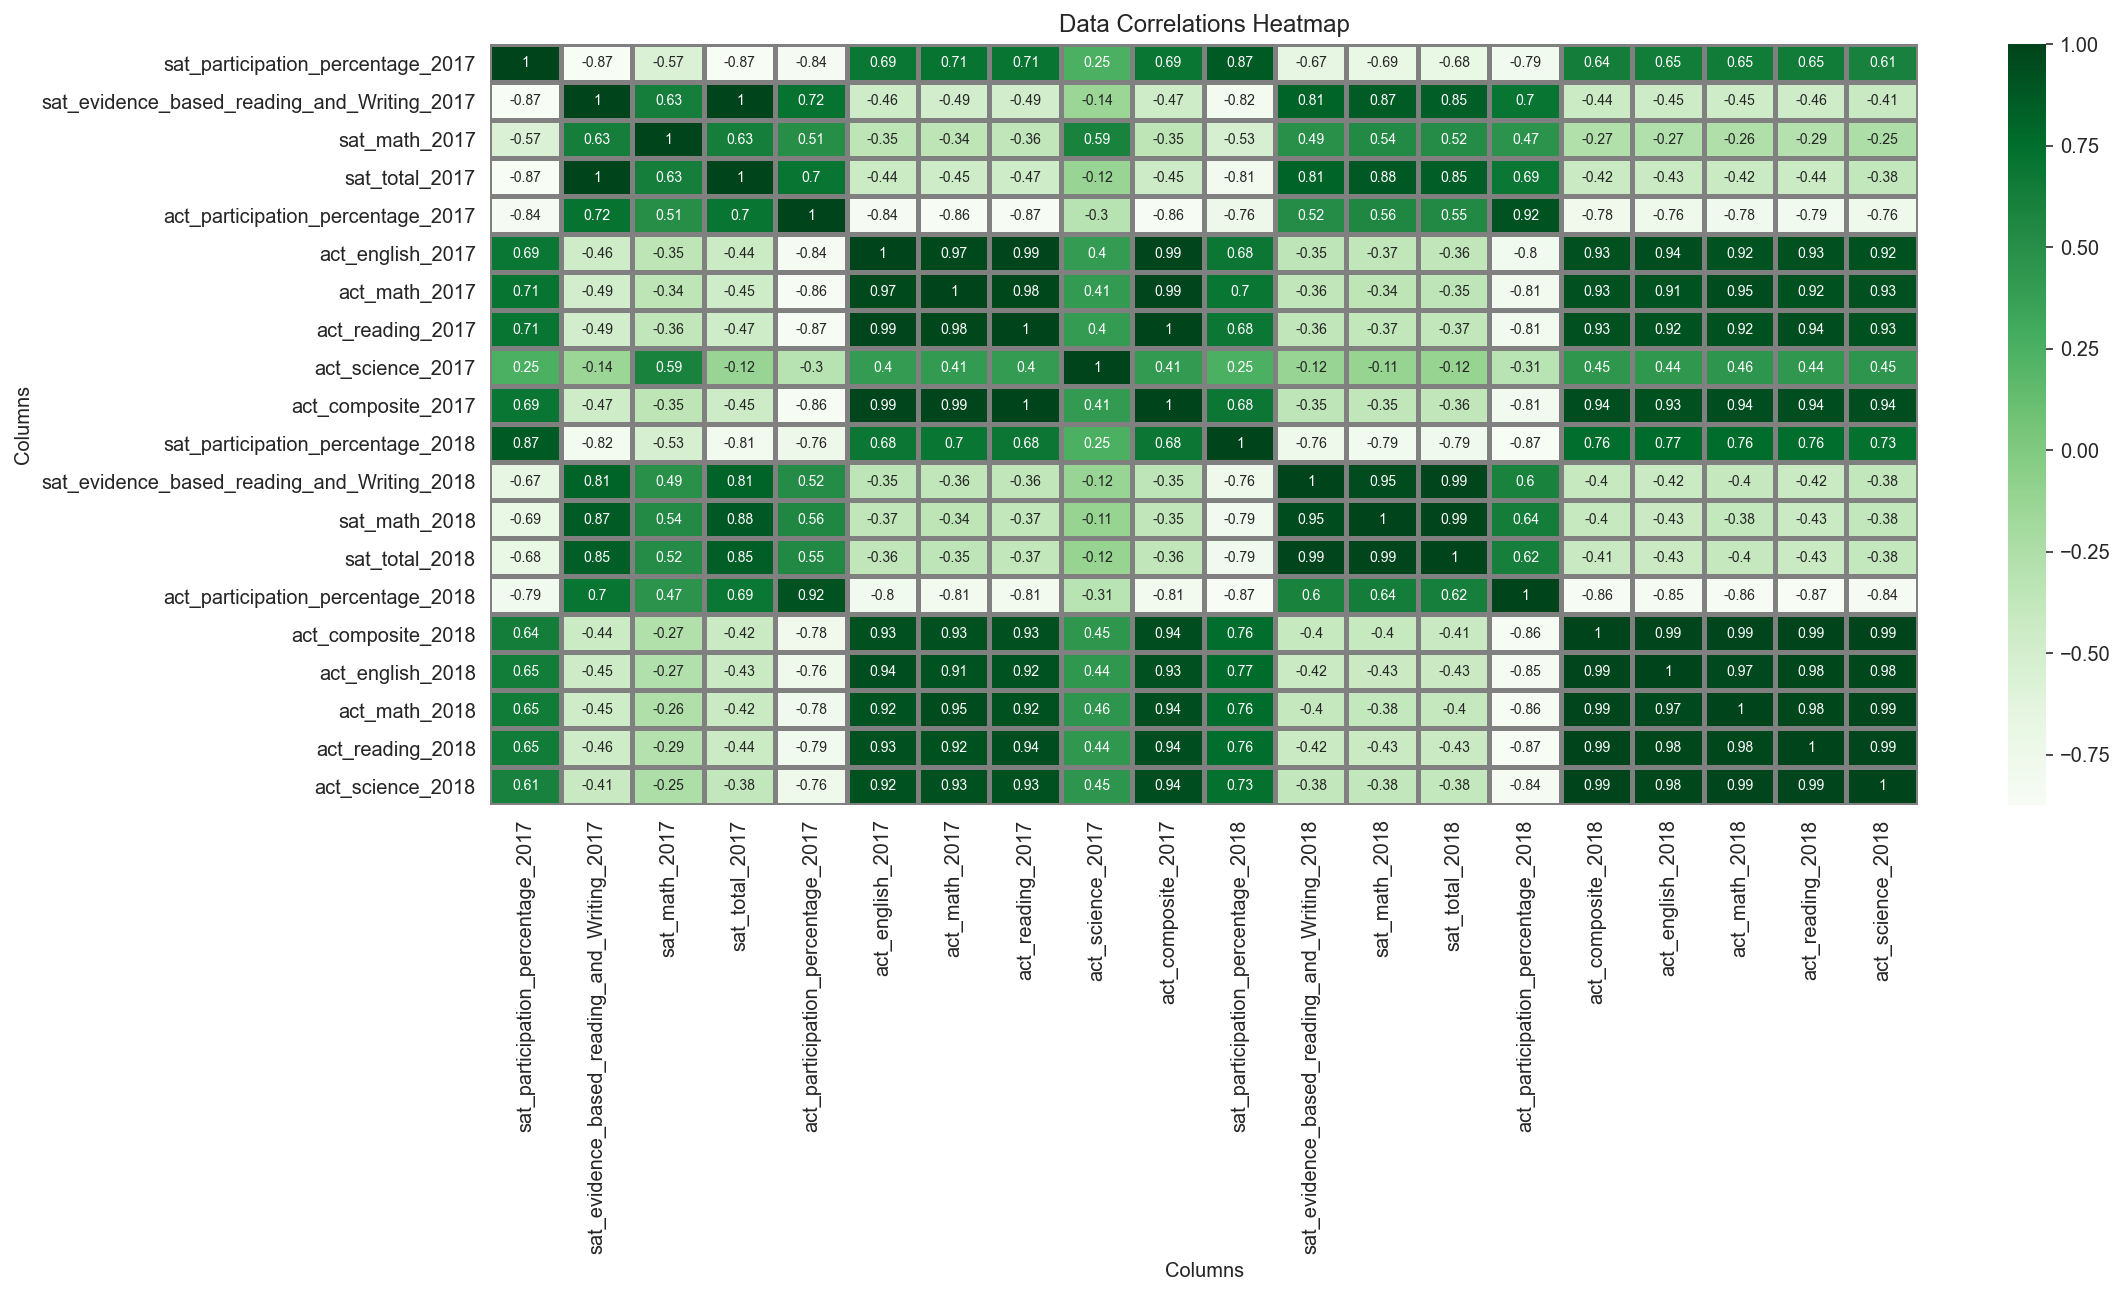

In [83]:
plt.figure(figsize=(16, 7))#set the figsize

ax = plt.axes()#unpack this tuple into the variables

sns.heatmap(final.corr(),cmap="Greens",annot=True, annot_kws={"size": 7},linewidths=2, linecolor='Grey'); #plot the heatmap

ax.set_title('Data Correlations Heatmap')#set title
ax.set_xlabel('Columns')#set xlabel
ax.set_ylabel('Columns')#set ylabel


#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [84]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(20,16)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists 
        ax[i].hist(dataframe[column],bins=10)
        ax[i].set_ylabel("Counts")# feel free to add more settings
    for i, titles in enumerate(list_of_titles):    
        ax[i].set_title(titles)
    for i, xlables in enumerate(list_of_xlabels):   
        ax[i].set_xlabel(xlables)# Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

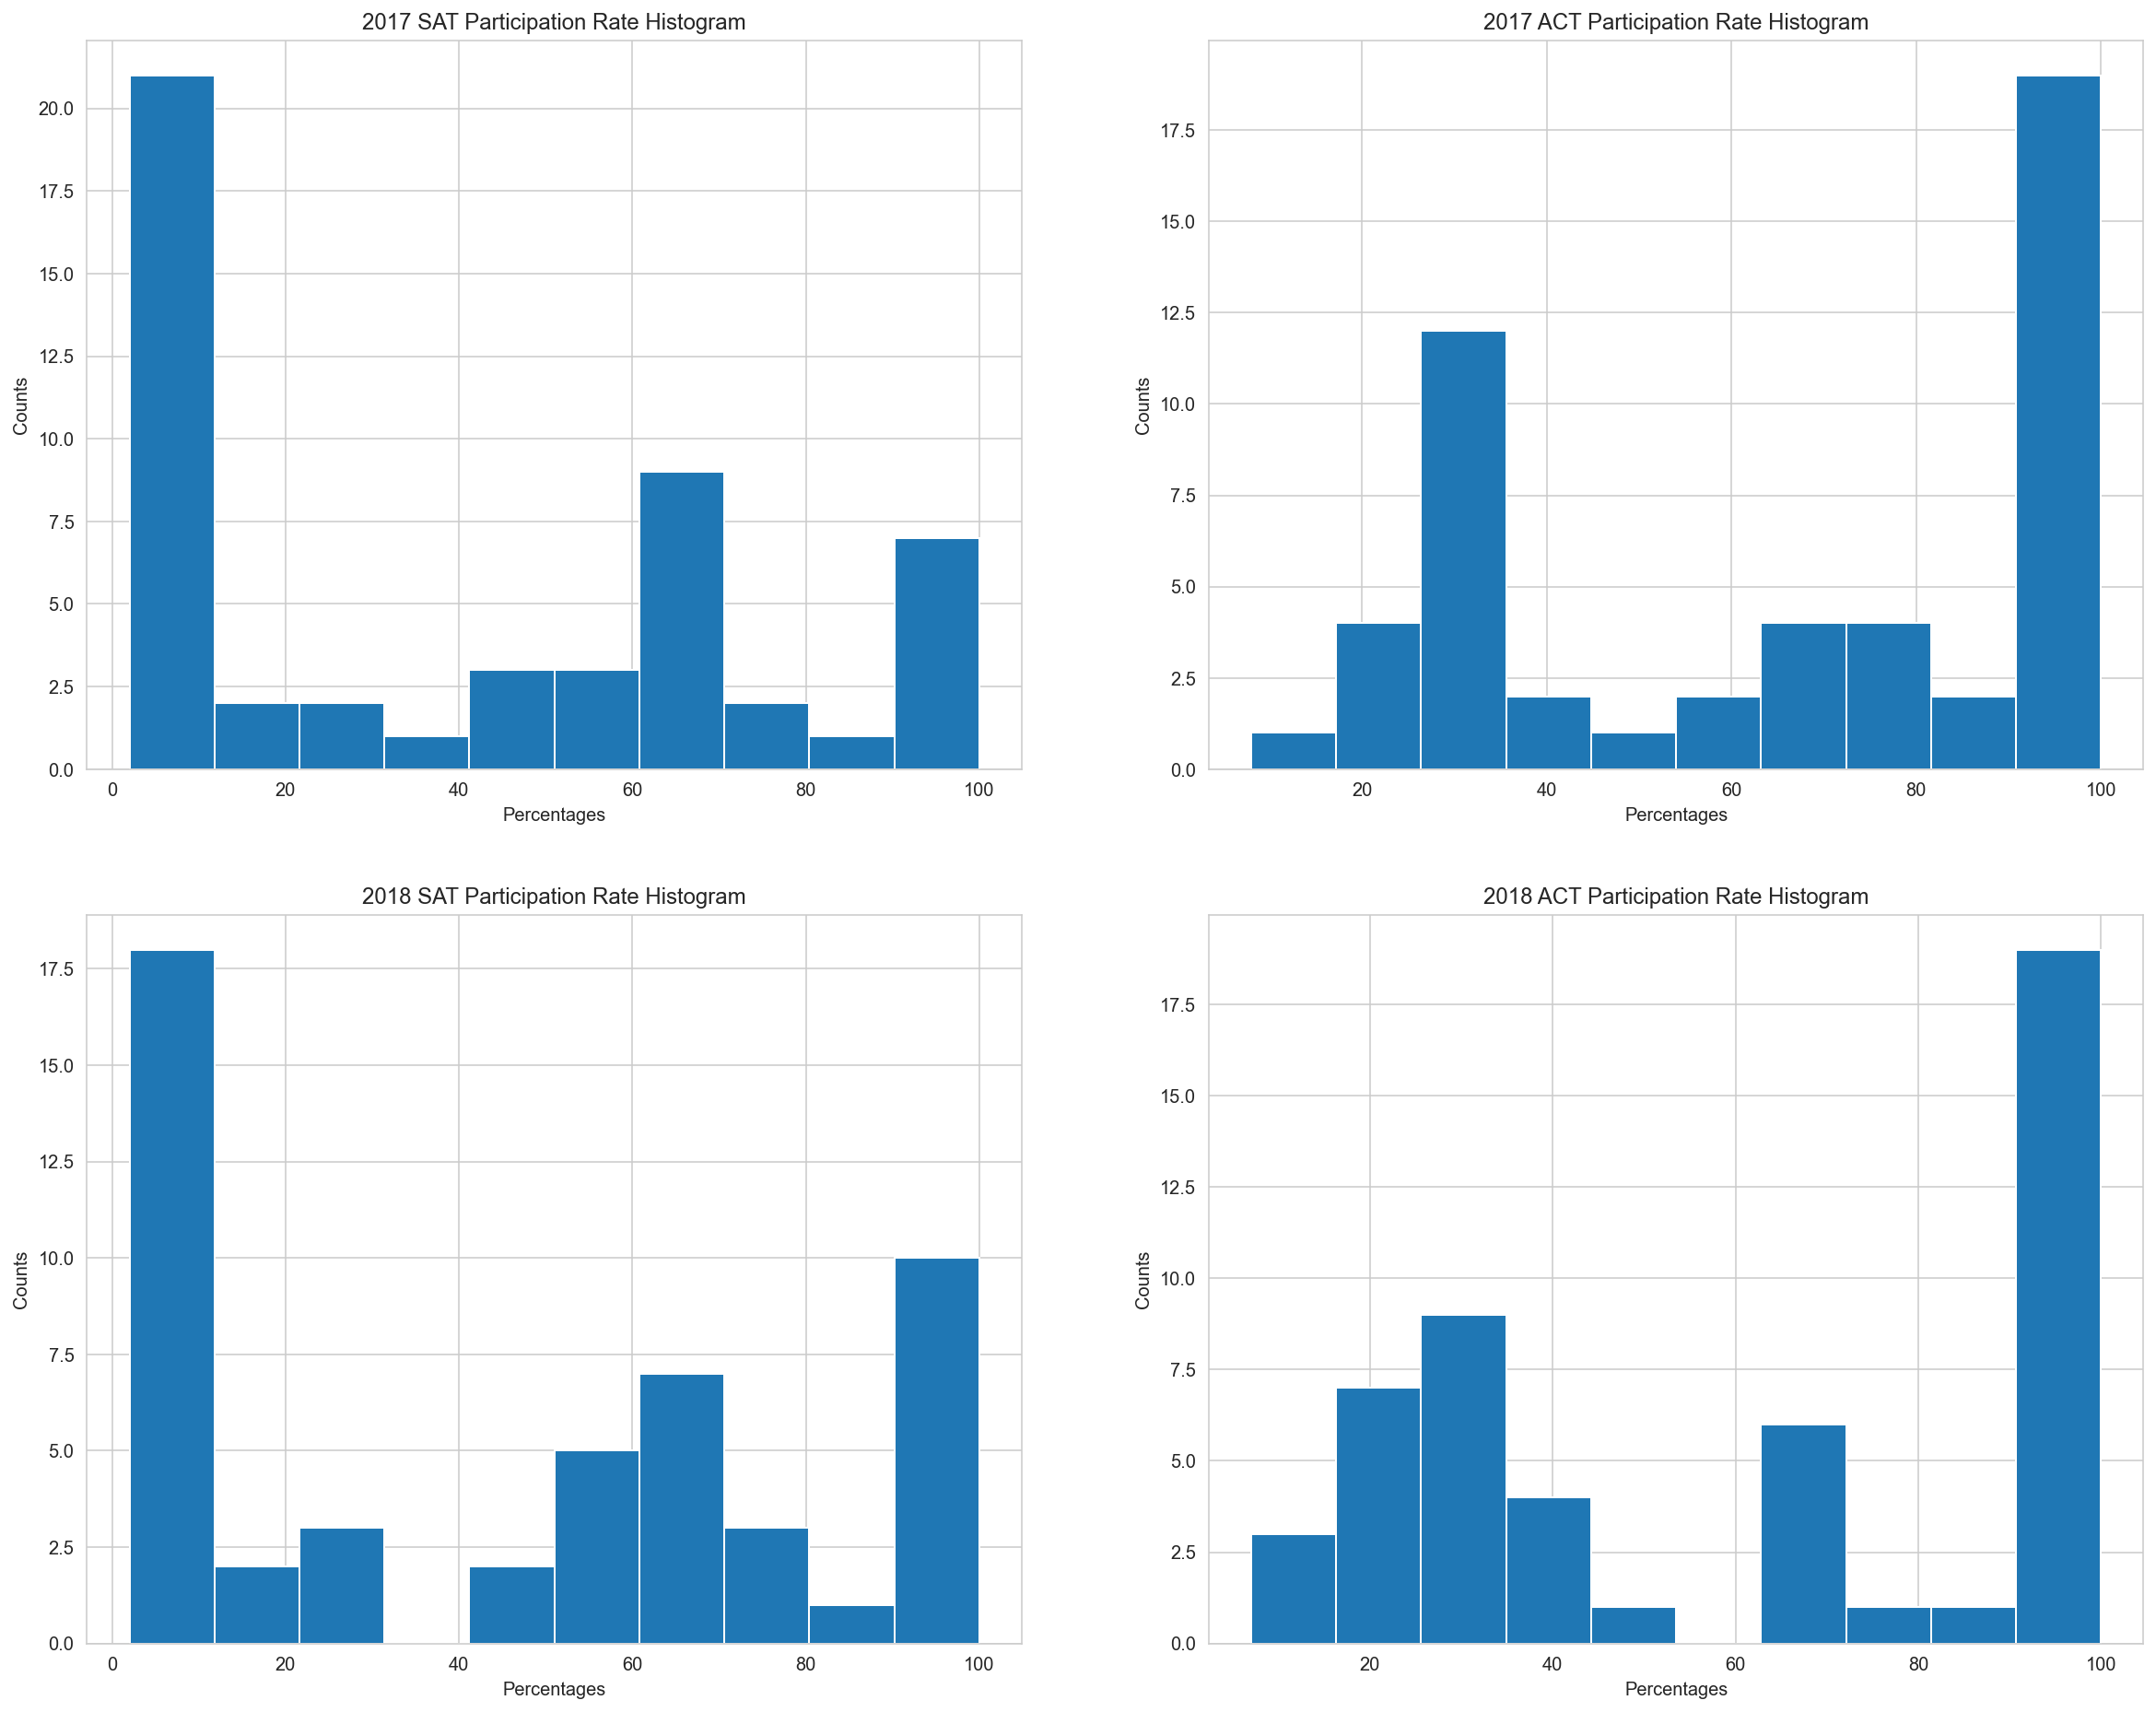

In [85]:
subplot_histograms(final,["sat_participation_percentage_2017","act_participation_percentage_2017","sat_participation_percentage_2018","act_participation_percentage_2018"],["2017 SAT Participation Rate Histogram","2017 ACT Participation Rate Histogram","2018 SAT Participation Rate Histogram","2018 ACT Participation Rate Histogram"],["Percentages","Percentages","Percentages","Percentages"])
#subplot histograms ACT vs SAT participation rate

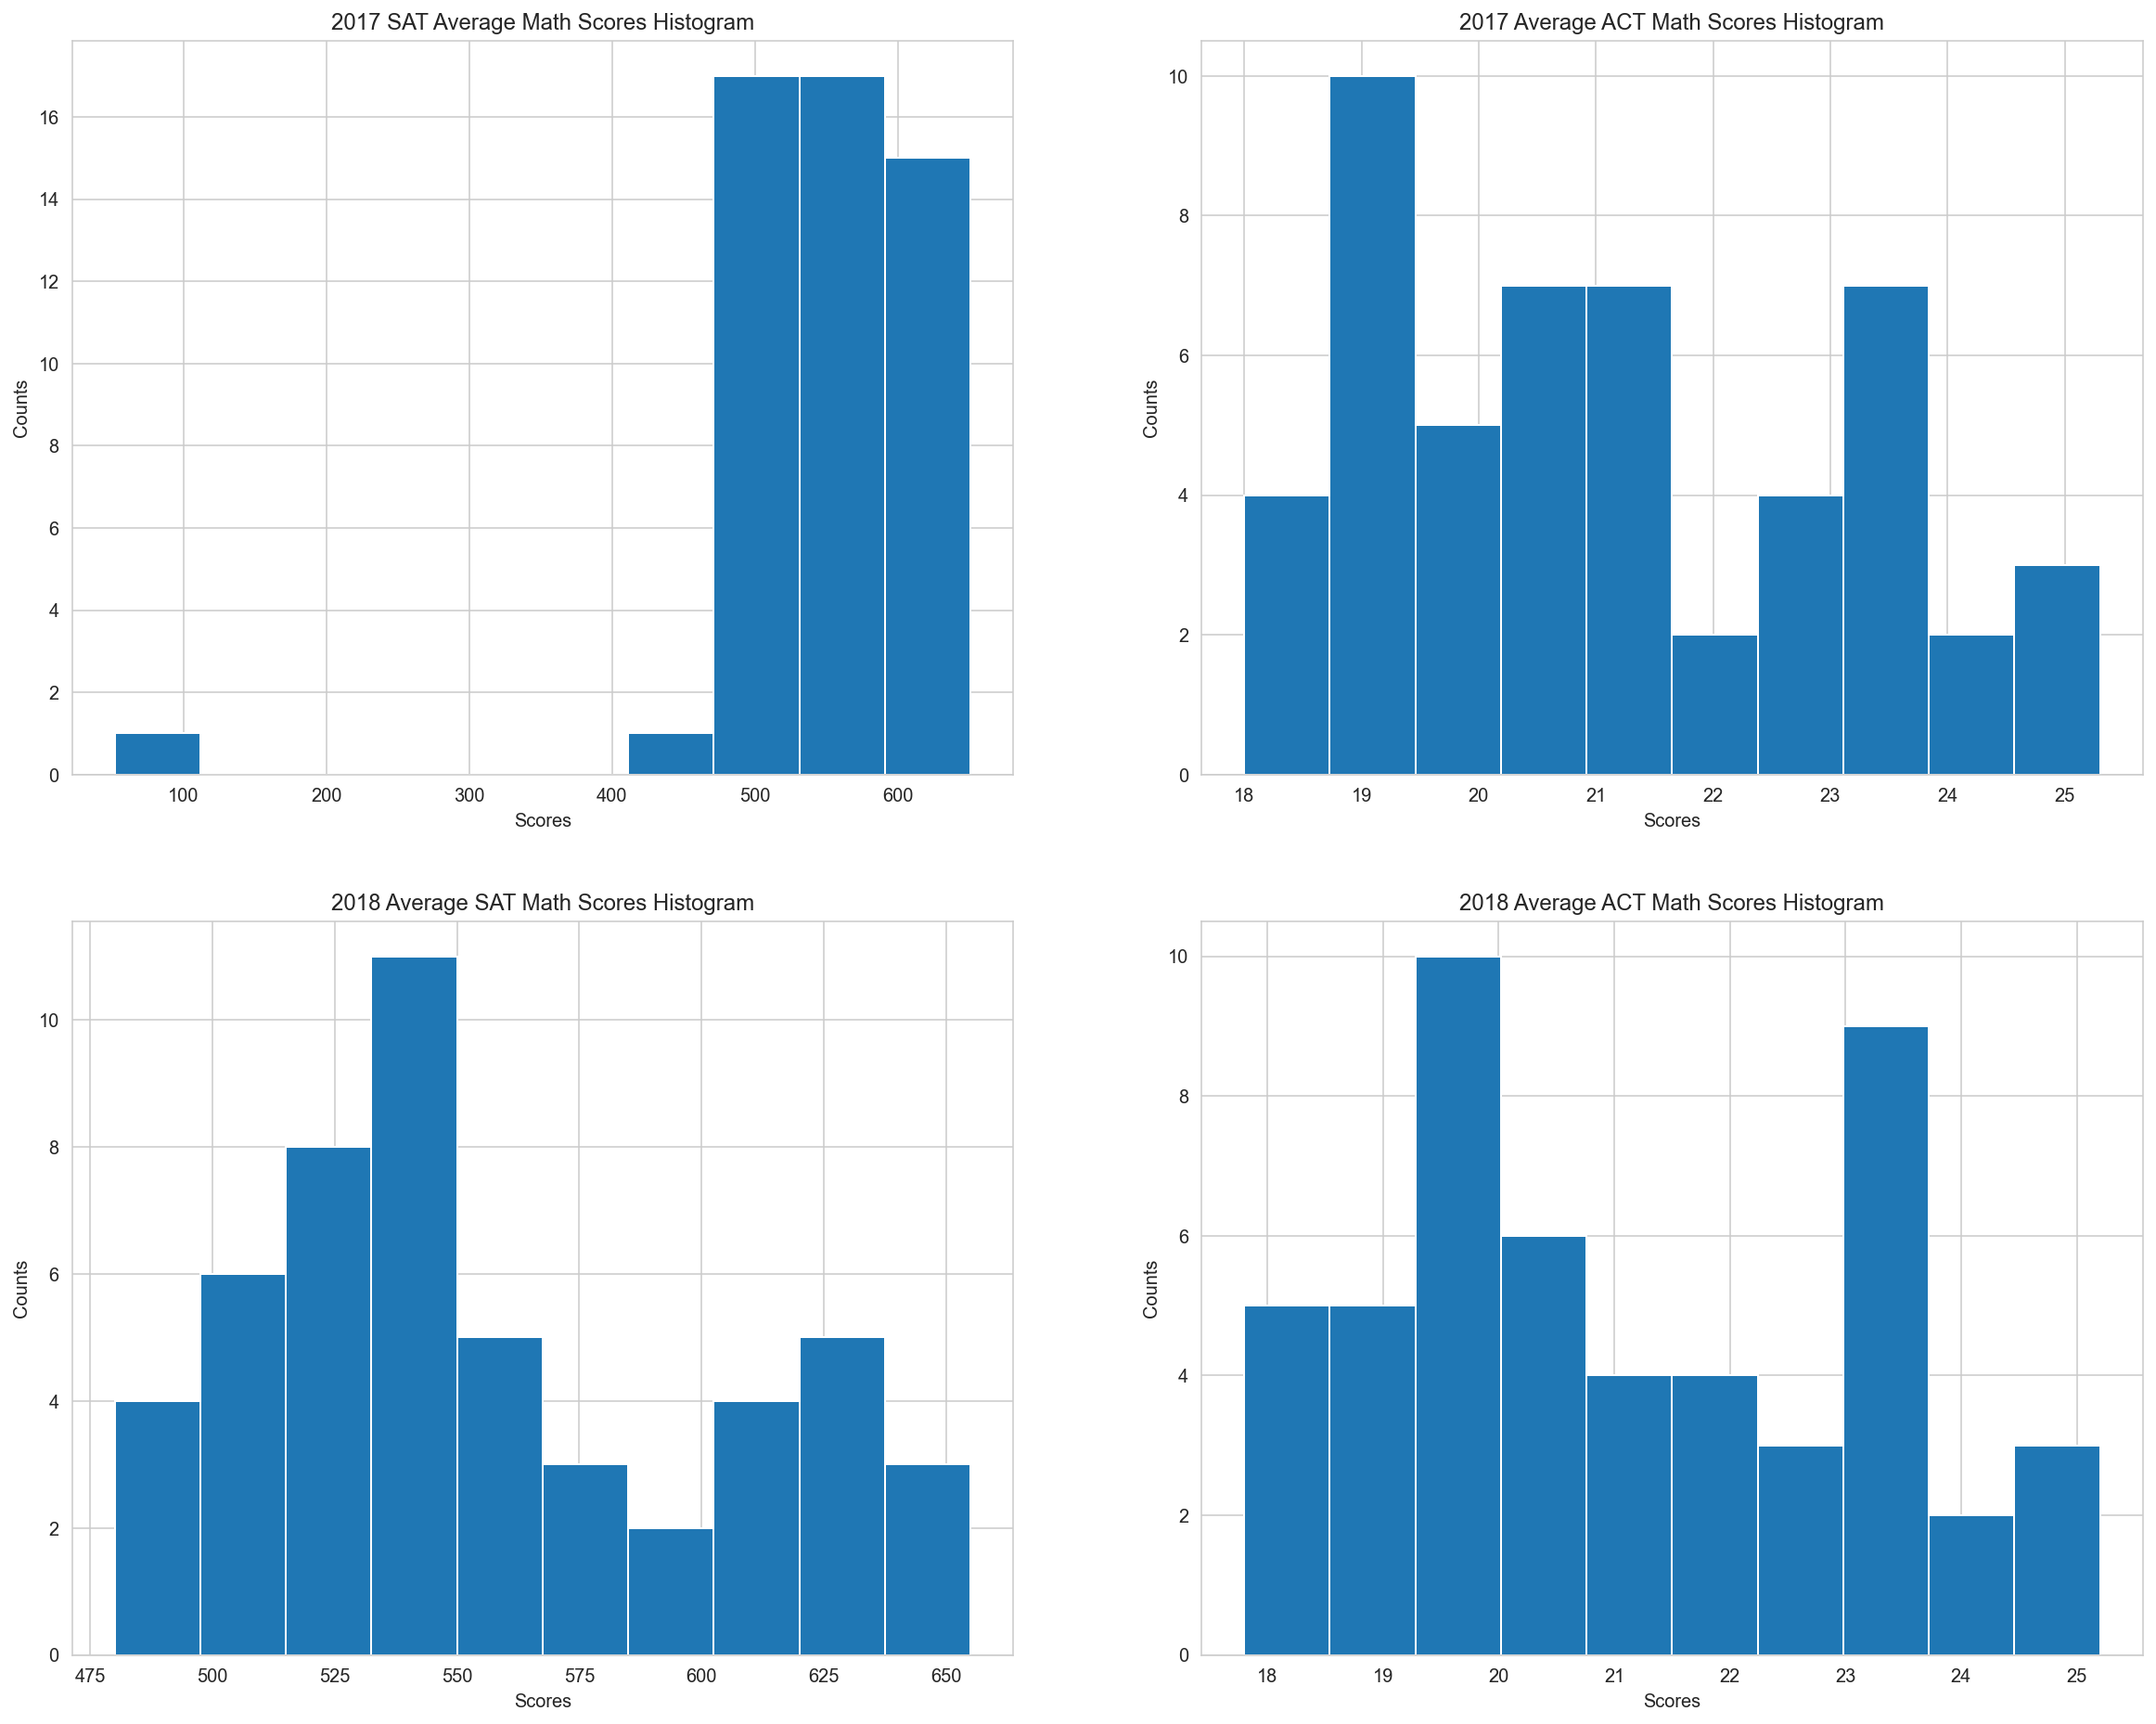

In [86]:
subplot_histograms(final,['sat_math_2017','act_math_2017','sat_math_2018','act_math_2018'],["2017 SAT Average Math Scores Histogram","2017 Average ACT Math Scores Histogram","2018 Average SAT Math Scores Histogram","2018 Average ACT Math Scores Histogram"],["Scores","Scores","Scores","Scores"])
#subplot histograms ACT vs SAT math score

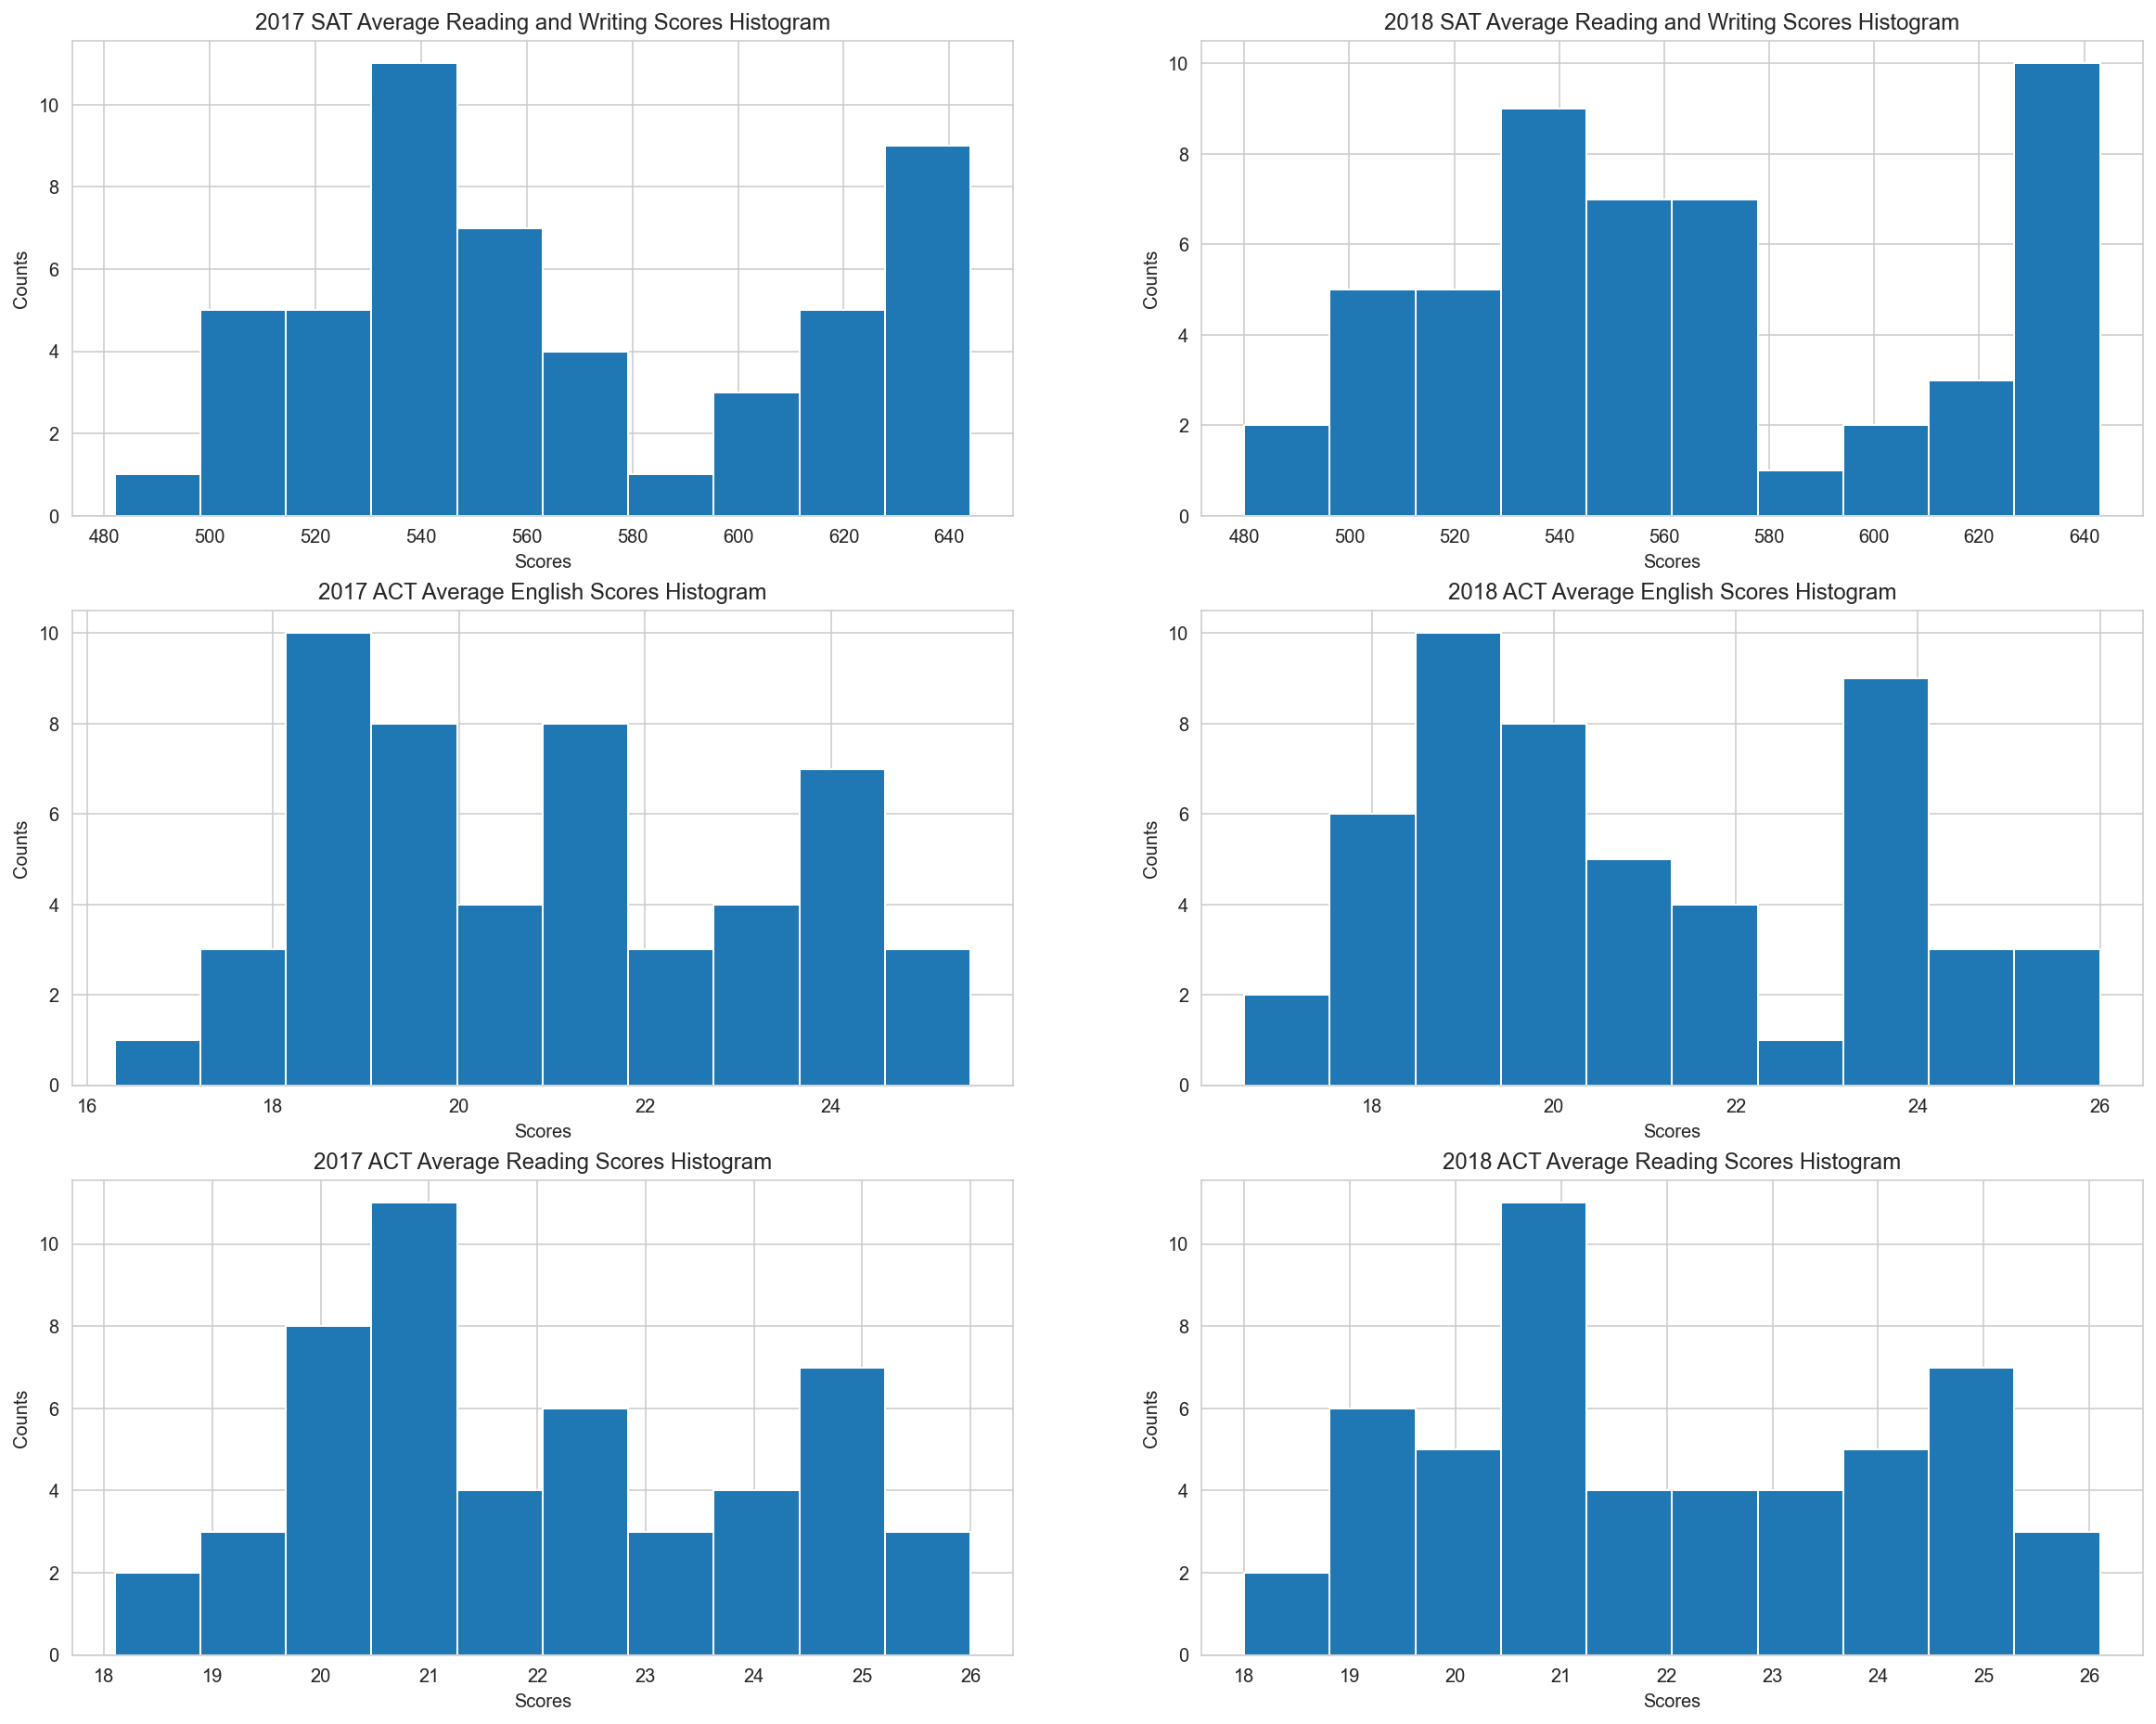

In [87]:
subplot_histograms(final,['sat_evidence_based_reading_and_Writing_2017','sat_evidence_based_reading_and_Writing_2018','act_english_2017','act_english_2018','act_reading_2017','act_reading_2018'],["2017 SAT Average Reading and Writing Scores Histogram","2018 SAT Average Reading and Writing Scores Histogram","2017 ACT Average English Scores Histogram","2018 ACT Average English Scores Histogram","2017 ACT Average Reading Scores Histogram","2018 ACT Average Reading Scores Histogram"],["Scores","Scores","Scores","Scores","Scores","Scores"])
#subplot histograms ACT vs SAT reading/writing scores

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


Text(0, 0.5, 'Average ACT Math Scores 2017')

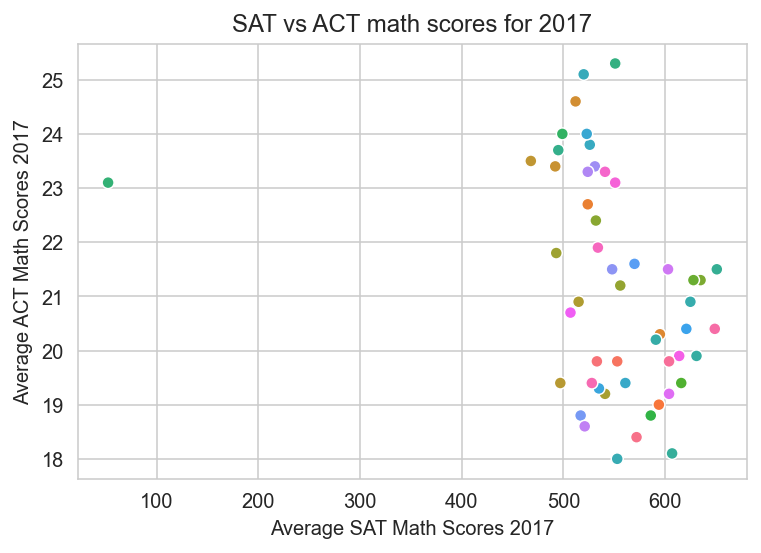

In [88]:
ax = plt.axes()#unpack this tuple into the variables
sns.scatterplot(x="sat_math_2017", y="act_math_2017",hue="state",data=final,legend=False)#plot scatterplot
ax.set_title('SAT vs ACT math scores for 2017')#set tilte
ax.set_xlabel('Average SAT Math Scores 2017')#set xlabel
ax.set_ylabel('Average ACT Math Scores 2017')#set ylabel


Text(0, 0.5, 'Average ACT Reading Scores 2017')

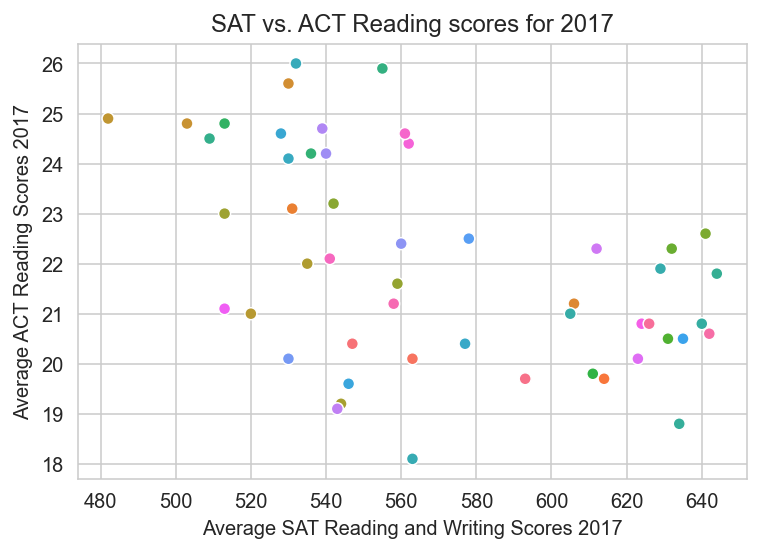

In [89]:
ax = plt.axes()#unpack this tuple into the variables
sns.scatterplot(x='sat_evidence_based_reading_and_Writing_2017', y="act_reading_2017",hue="state",data=final,legend=False)
ax.set_title("SAT vs. ACT Reading scores for 2017")
ax.set_xlabel('Average SAT Reading and Writing Scores 2017')
ax.set_ylabel('Average ACT Reading Scores 2017')

Text(0, 0.5, 'Average ACT Verbal Scores 2017')

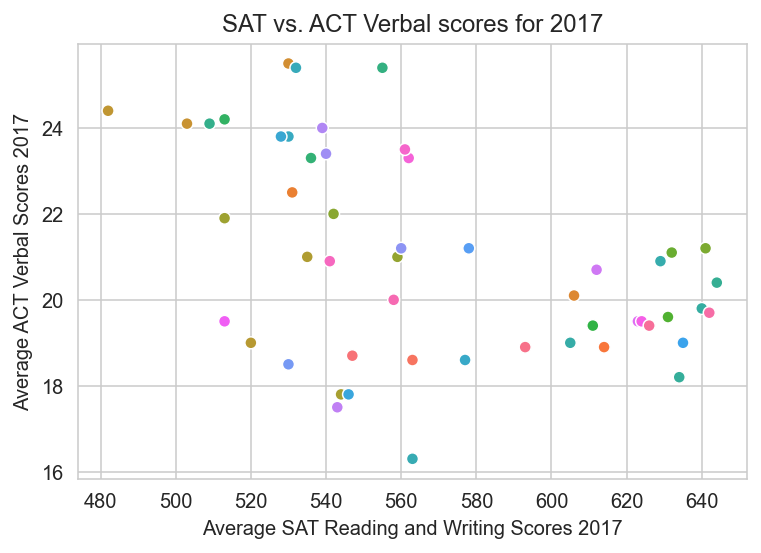

In [90]:
ax = plt.axes()#unpack this tuple into the variables
sns.scatterplot(x='sat_evidence_based_reading_and_Writing_2017', y="act_english_2017",hue="state",data=final,legend=False)#plot graph
ax.set_title("SAT vs. ACT Verbal scores for 2017")#set title
ax.set_xlabel('Average SAT Reading and Writing Scores 2017')#xlabel
ax.set_ylabel('Average ACT Verbal Scores 2017')#ylabel

Text(0, 0.5, 'Average ACT Composite score 2017')

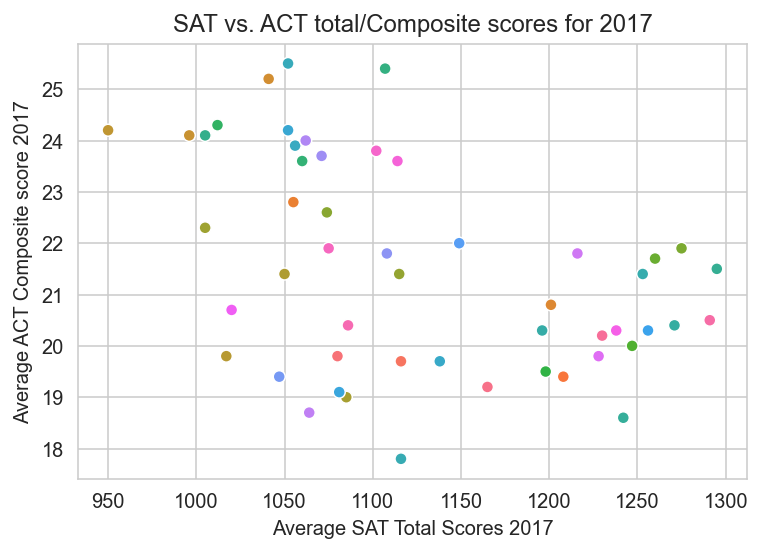

In [91]:
ax = plt.axes()#unpack this tuple into the variables
sns.scatterplot(x='sat_total_2017', y="act_composite_2017",hue="state",data=final,legend=False)#plot the graph
ax.set_title("SAT vs. ACT total/Composite scores for 2017")#set title
ax.set_xlabel('Average SAT Total Scores 2017')#set xlabel
ax.set_ylabel('Average ACT Composite score 2017')#set ylabel

Text(0, 0.5, 'Average SAT Total Scores 2018')

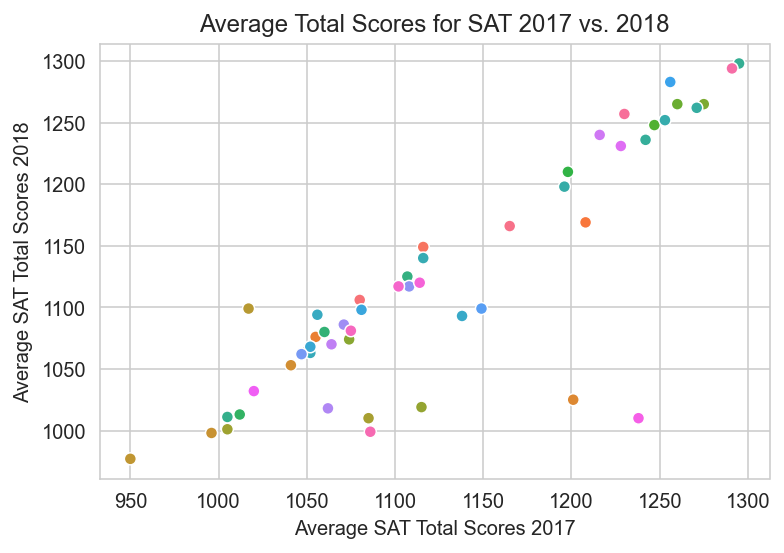

In [92]:
ax = plt.axes()#unpack this tuple into the variables
sns.scatterplot(x='sat_total_2017', y="sat_total_2018",hue="state",data=final,legend=False)#plot graph
ax.set_title("Average Total Scores for SAT 2017 vs. 2018")#set title
ax.set_xlabel('Average SAT Total Scores 2017')#set xlabel
ax.set_ylabel('Average SAT Total Scores 2018')#set ylabel

Text(0, 0.5, 'Average ACT Composite Scores 2018')

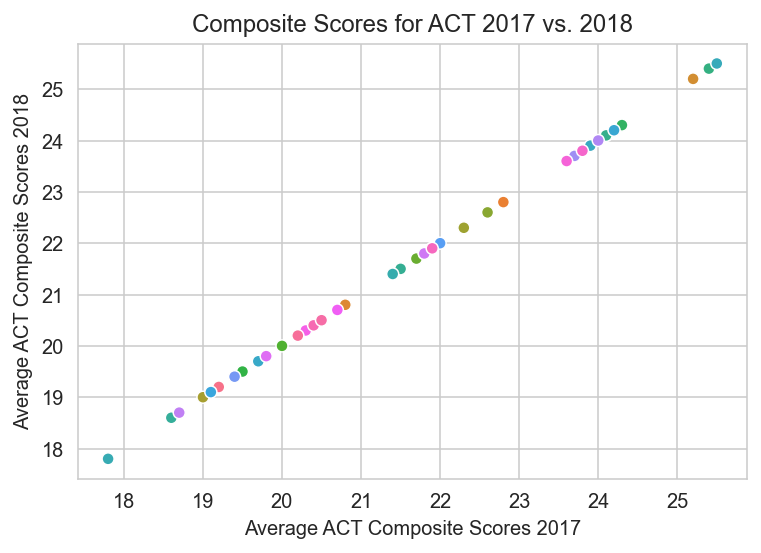

In [93]:
ax = plt.axes()#unpack this tuple into the variables
sns.scatterplot(x='act_composite_2017', y="act_composite_2017",hue="state",data=final,legend=False)#plot graph
ax.set_title("Composite Scores for ACT 2017 vs. 2018")#set title
ax.set_xlabel('Average ACT Composite Scores 2017')#set xlabel
ax.set_ylabel('Average ACT Composite Scores 2018')#set ylabel

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

Text(0, 0.5, 'Columns')

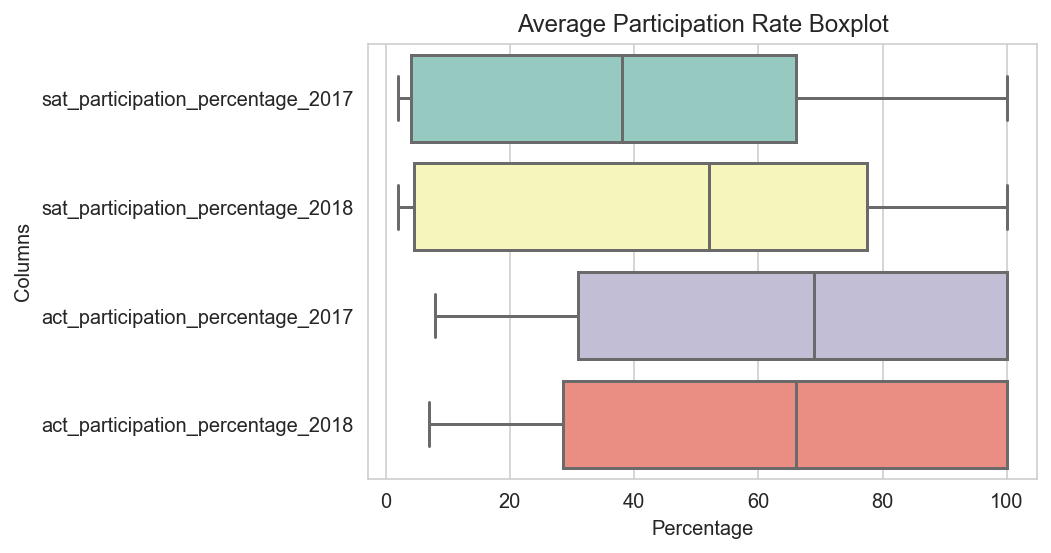

In [94]:
ax = plt.axes()#unpack this tuple into the variables
sns.boxplot(data=final[["sat_participation_percentage_2017","sat_participation_percentage_2018","act_participation_percentage_2017","act_participation_percentage_2018"]],orient="h",palette="Set3")
#plot the graphy
ax.set_title("Average Participation Rate Boxplot")#set_title
ax.set_xlabel('Percentage')#set xlabel
ax.set_ylabel('Columns')#set ylabel

Text(0, 0.5, 'Columns')

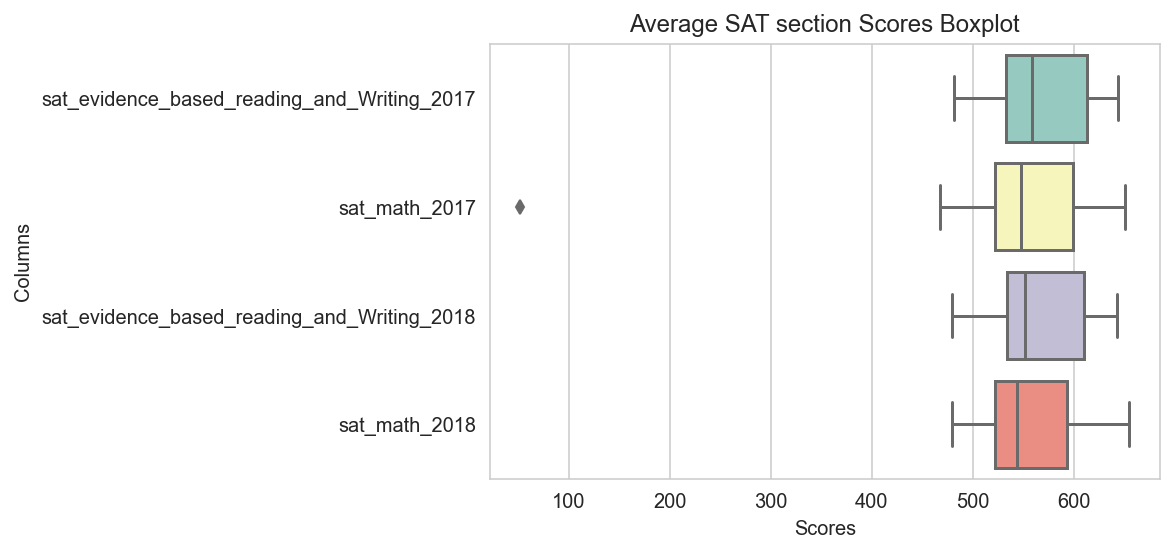

In [95]:
ax = plt.axes()#unpack this tuple into the variables
sns.boxplot(data=final[["sat_evidence_based_reading_and_Writing_2017","sat_math_2017","sat_evidence_based_reading_and_Writing_2018","sat_math_2018"]],orient="h",palette="Set3")
#plot graph
ax.set_title("Average SAT section Scores Boxplot")#set title
ax.set_xlabel('Scores')#set xlabel
ax.set_ylabel('Columns')#set ylabel

Text(0, 0.5, 'Columns')

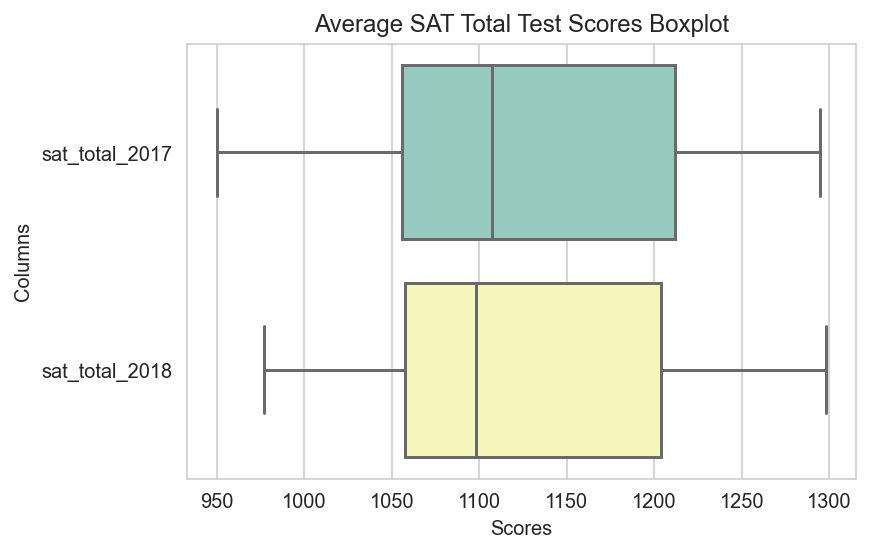

In [96]:
ax = plt.axes()#unpack this tuple into the variables
sns.boxplot(data=final[["sat_total_2017","sat_total_2018"]],orient="h",palette="Set3")#plot graphy
ax.set_title("Average SAT Total Test Scores Boxplot")#set title
ax.set_xlabel('Scores')#set xlabel
ax.set_ylabel('Columns')#set ylabel

Text(0, 0.5, 'Columns')

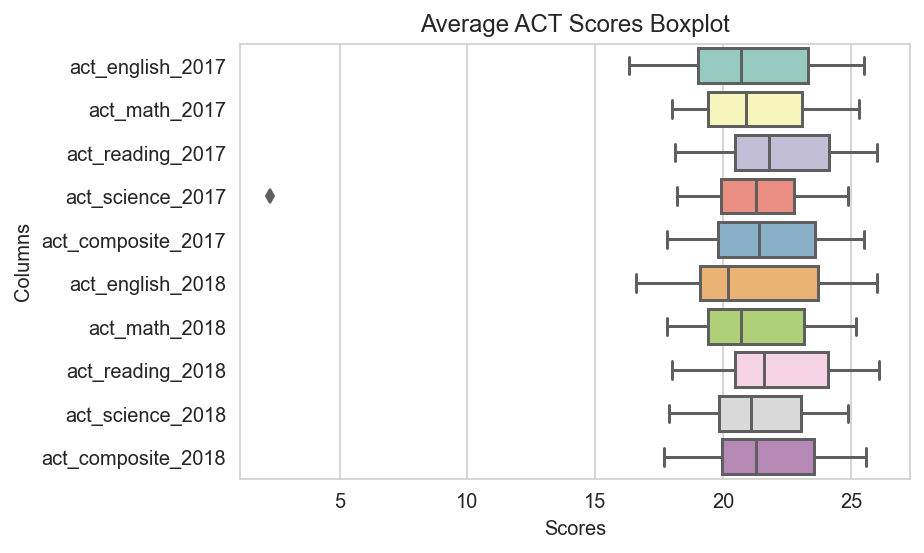

In [97]:
ax = plt.axes()#unpack this tuple into the variables
sns.boxplot(data=final[["act_english_2017","act_math_2017","act_reading_2017","act_science_2017","act_composite_2017","act_english_2018","act_math_2018","act_reading_2018","act_science_2018","act_composite_2018"]],orient="h",palette="Set3")
#plot the graphy
ax.set_title("Average ACT Scores Boxplot")#set title
ax.set_xlabel('Scores')#set xlabel
ax.set_ylabel('Columns')#set ylabel

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [98]:
final.head()

,state,sat_participation_percentage_2017,sat_evidence_based_reading_and_Writing_2017,sat_math_2017,sat_total_2017,act_participation_percentage_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_percentage_2018,sat_evidence_based_reading_and_Writing_2018,sat_math_2018,sat_total_2018,act_participation_percentage_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,...,6,595,571,1166,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,...,43,562,544,1106,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,...,29,577,572,1149,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,...,5,592,576,1169,100,19.4,19.1,18.9,19.7,19.4
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,...,60,540,536,1076,27,22.7,22.5,22.5,23.0,22.1


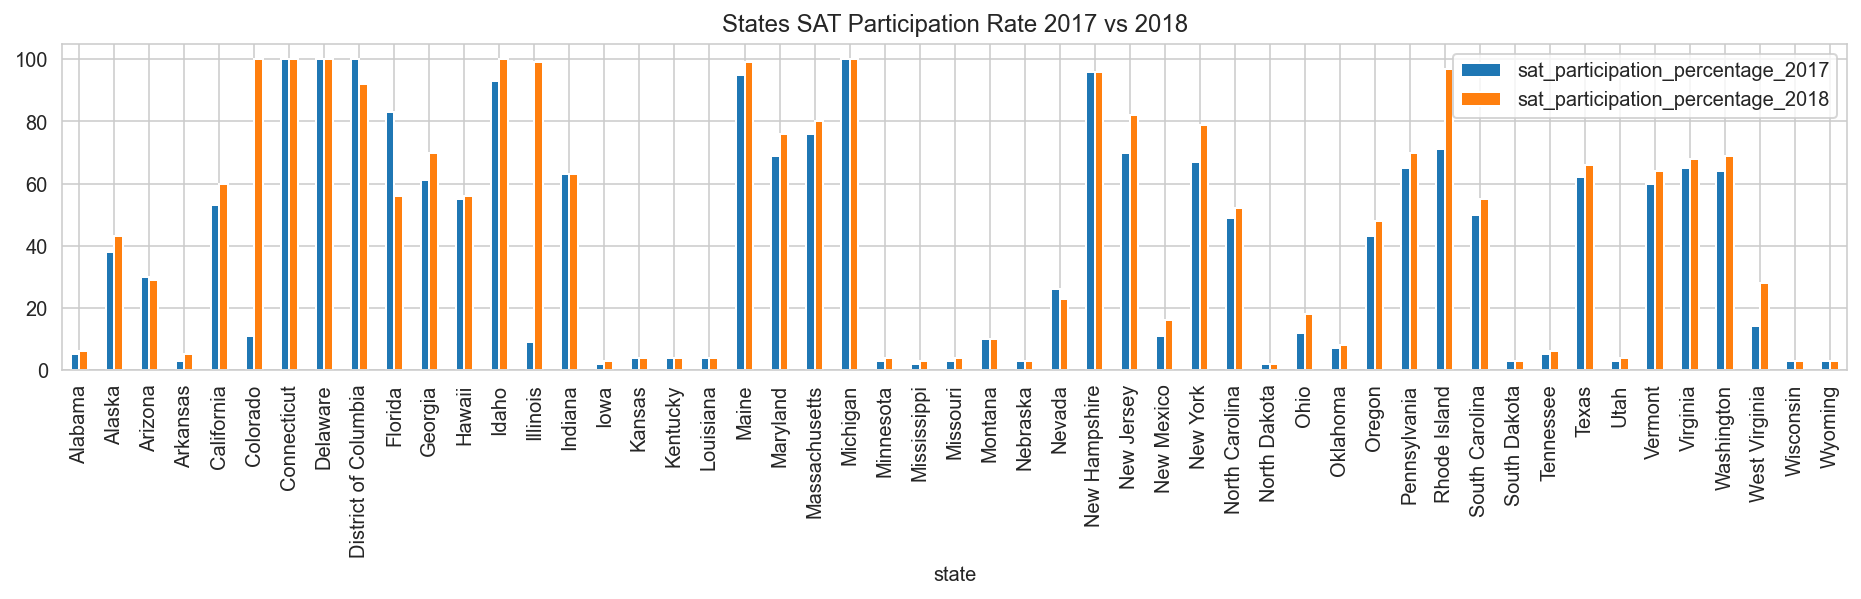

In [99]:
#plot bar chart for sat participation rate 2017 vs 2018 
final.plot(x="state", y=["sat_participation_percentage_2017", "sat_participation_percentage_2018"], kind="bar",figsize=(16,3),title="States SAT Participation Rate 2017 vs 2018",fontsize=10)

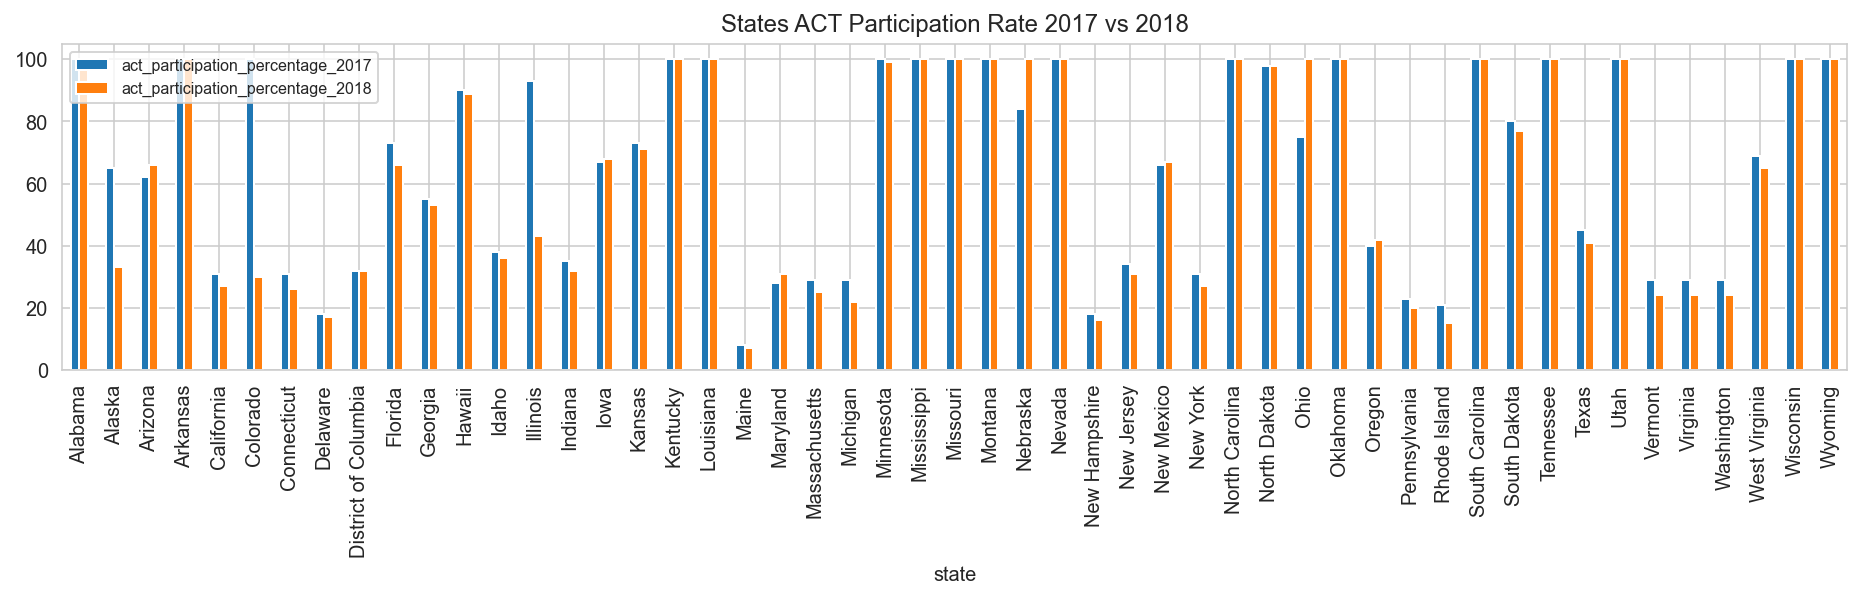

In [148]:
#plot bar chart for act participation rate 2017 vs 2018
ax=final.plot(x="state", y=["act_participation_percentage_2017", "act_participation_percentage_2018"], kind="bar",figsize=(16,3),title="States ACT Participation Rate 2017 vs 2018",fontsize=10,)
ax.legend(prop={'size': 8})

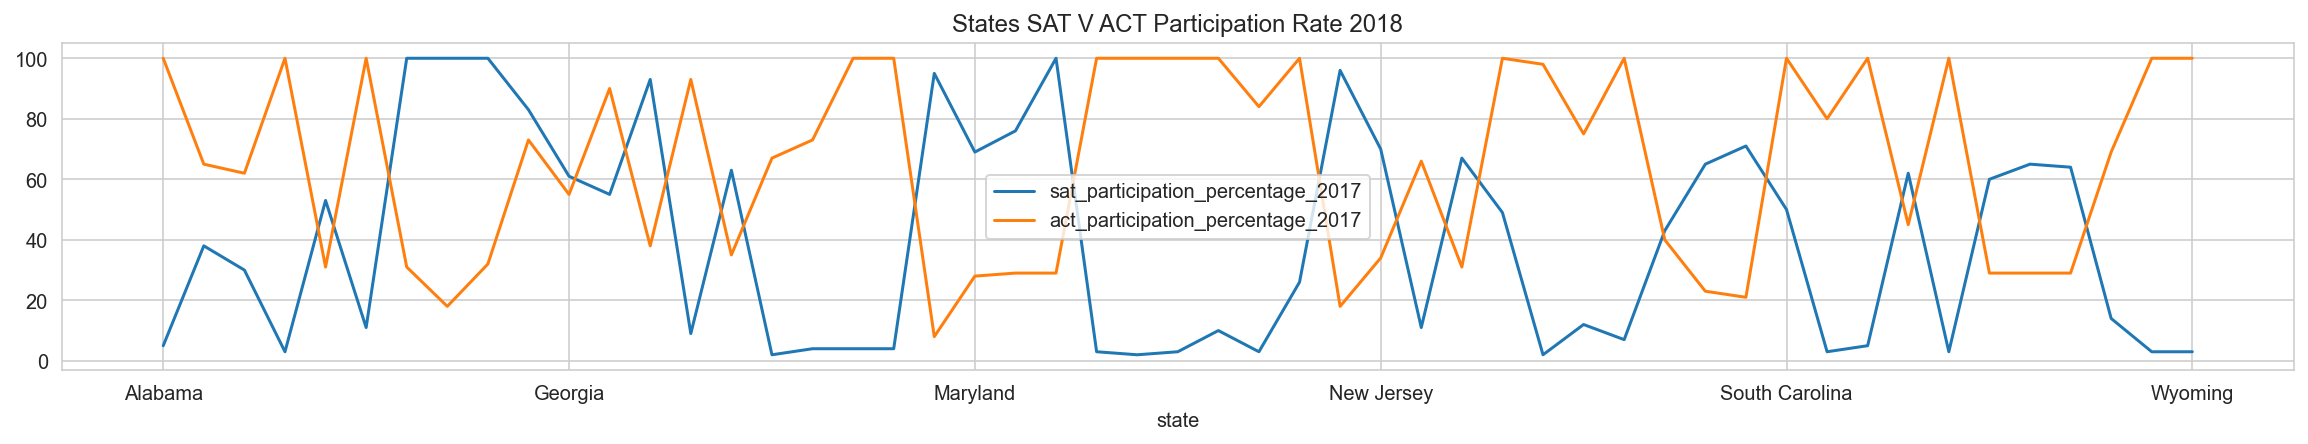

In [101]:
#plot the lines for 2017 participation rate  SAT vs ACT
final.plot(x="state", y=["sat_participation_percentage_2017", "act_participation_percentage_2017"], kind="line",figsize=(20,3),title="States SAT V ACT Participation Rate 2018",fontsize=10) 

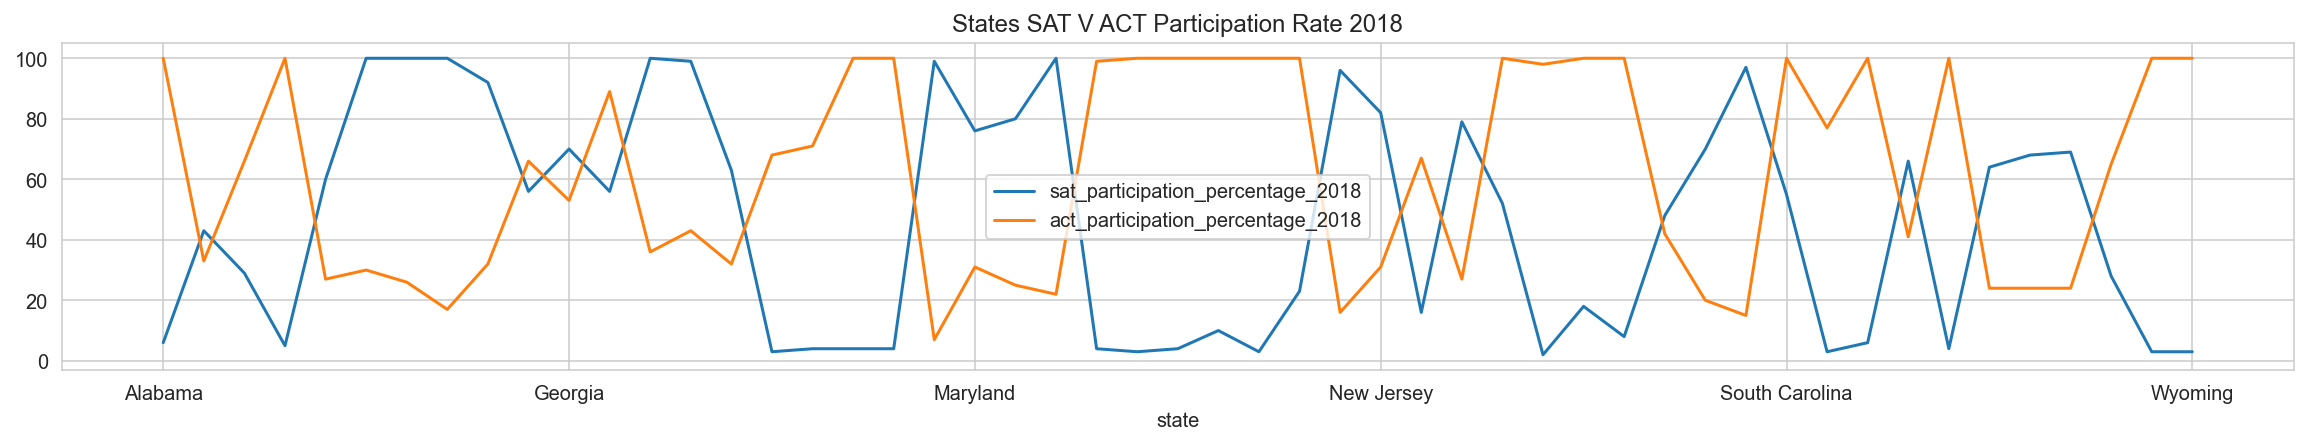

In [102]:
#plot the lines for 2018 participation rate  SAT vs ACT
final.plot(x="state", y=["sat_participation_percentage_2018", "act_participation_percentage_2018"], kind="line",figsize=(20,3),title="States SAT V ACT Participation Rate 2018",fontsize=10) 

#### State with high SAT participation rate normally will associate with Low ACT participation rate.

### Plot the Graph for interested State 

In [103]:
#creat a dataframe and drop unneccessary columns
participation_rate=final.drop(columns=["act_science_2017","act_science_2018",'act_english_2017', "act_english_2018","act_math_2017","act_math_2018","act_composite_2017","act_composite_2018","act_reading_2017","act_reading_2018","sat_math_2017","sat_math_2018","sat_total_2017","sat_total_2018","sat_evidence_based_reading_and_Writing_2017","sat_evidence_based_reading_and_Writing_2018"])

In [104]:
participation_rate.head()

,state,sat_participation_percentage_2017,act_participation_percentage_2017,sat_participation_percentage_2018,act_participation_percentage_2018
0,Alabama,5,100,6,100
1,Alaska,38,65,43,33
2,Arizona,30,62,29,66
3,Arkansas,3,100,5,100
4,California,53,31,60,27


#### Plot for State IllINOIS

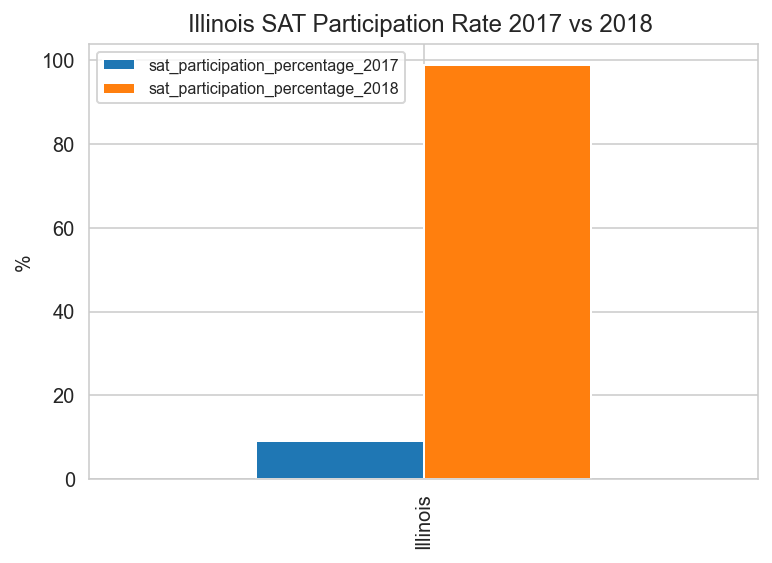

In [105]:
ax=participation_rate.groupby("state").get_group("Illinois").plot(x="state", y=["sat_participation_percentage_2017","sat_participation_percentage_2018"],kind="bar")
#plot the bar chart
ax.set_title("Illinois SAT Participation Rate 2017 vs 2018 ")#set title
ax.set_xlabel("")#set xlabel
ax.set_ylabel("%")#set ylabel
ax.legend(prop={'size': 8})#set legend size

#### Plot for State Colorado

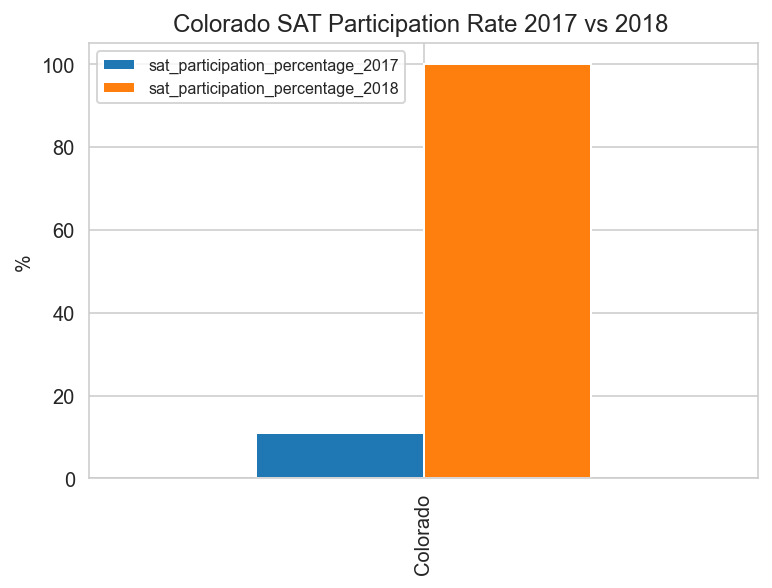

In [106]:
ax=participation_rate.groupby("state").get_group("Colorado").plot(x="state", y=["sat_participation_percentage_2017","sat_participation_percentage_2018"],kind="bar")
#plot the bar chart
ax.set_title("Colorado SAT Participation Rate 2017 vs 2018 ")#set title
ax.set_xlabel("")#set xlabel
ax.set_ylabel("%")#set ylabel
ax.legend(prop={'size': 8})#set Legend size

#### Very sharp increment for SAT Participation Rate from 2017 to 2018 in Colorado and Illinois

#### Plot for State Colorado

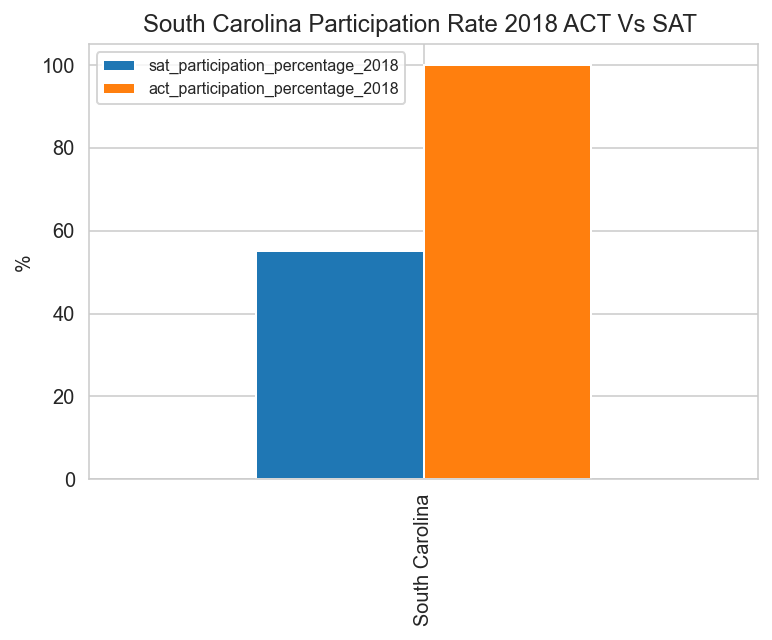

In [107]:
ax=participation_rate.groupby("state").get_group("South Carolina").plot(x="state", y=["sat_participation_percentage_2018","act_participation_percentage_2018"],kind="bar")
#plot the bar chart
ax.set_title("South Carolina Participation Rate 2018 ACT Vs SAT ")#set title
ax.set_xlabel("")#set xlabel
ax.set_ylabel("%")#set ylabel
ax.legend(prop={'size': 8})#set Legend size

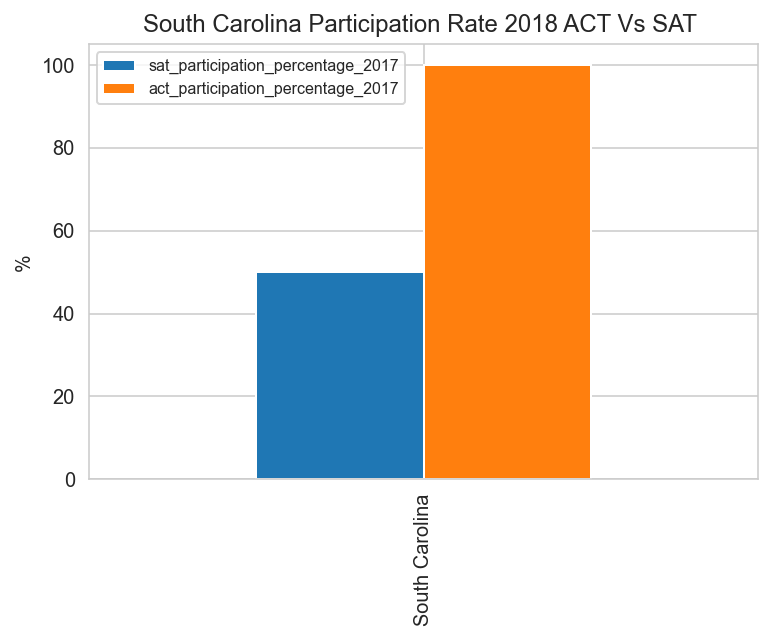

In [108]:
ax=participation_rate.groupby("state").get_group("South Carolina").plot(x="state", y=["sat_participation_percentage_2017","act_participation_percentage_2017"],kind="bar")
#plot the bar chart
ax.set_title("South Carolina Participation Rate 2018 ACT Vs SAT ")#set title
ax.set_xlabel("")#set xlabel
ax.set_ylabel("%")#set ylabel
ax.legend(prop={'size': 8})#set Legend size

#### Around 50% of student in South Carolina would like to take both tests

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

![SAT_Participation_Rate_2017](Picture/SAT_Participation_Rate_2017.png)

![SAT_Participation_Rate_2018](Picture/SAT_Participation_Rate_2018.png)

![ACT_Participation_Rate_2017](Picture/ACT_Participation_Rate_2017.png)

![ACT_Participation_Rate_2018](Picture/ACT_Participation_Rate_2018.png)

![SAT_EWR_2017](Picture/SAT_EWR_2017.png)

![SAT_EWR_2018](Picture/SAT_EWR_2018.png)

![SAT_Math_2017](Picture/SAT_Math_2017.png)

![SAT_Math_2018](Picture/SAT_Math_2018.png)

![SAT_Total_2017](Picture/SAT_Total_2017.png)

![SAT_Total_2018](Picture/SAT_Total_2018.png)

![ACT_English_2017](Picture/ACT_English_2017.png)

![ACT_English_2018](Picture/ACT_English_2018.png)

![ACT_Math_2017](Picture/ACT_Math_2017.png)

![ACT_Math_2018](Picture/ACT_Math_2018.png)

![ACT_Reading_2017](Picture/ACT_Reading_2017.png)

![ACT_Reading_2018](Picture/ACT_Reading_2018.png)

![ACT_Science_2017](Picture/ACT_Science_2017.png)

![ACT_Science_2018](Picture/ACT_Science_2018.png)

![ACT_Composite_2017](Picture/ACT_Composite_2017.png)

![ACT_Composite_2018](Picture/ACT_Composite_2018.png)

#### States with high ACT participation Rate trend to located in the center part of US, and the states with high SAT Participation Rate trend to located in the Northeast and southwest of US

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [109]:
final.describe()

,sat_participation_percentage_2017,sat_evidence_based_reading_and_Writing_2017,sat_math_2017,sat_total_2017,act_participation_percentage_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_percentage_2018,sat_evidence_based_reading_and_Writing_2018,sat_math_2018,sat_total_2018,act_participation_percentage_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,547.627451,1126.098039,65.254902,20.931373,21.182353,22.013725,21.041176,21.519608,45.745098,563.686275,556.235294,1120.019608,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,35.276632,45.666901,84.909119,92.494812,32.140842,2.353677,1.981989,2.067271,3.182463,2.020695,37.314256,47.502627,47.772623,94.155083,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,2.000000,482.000000,52.000000,950.000000,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000,2.000000,480.000000,480.000000,977.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,4.000000,533.500000,522.000000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.900000,19.800000,4.500000,534.500000,522.500000,1057.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,52.000000,552.000000,544.000000,1098.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,22.750000,23.600000,77.500000,610.500000,593.500000,1204.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


Answers: For 2017 SAT Participation rate, all States data trends to distribute at the central position which has the mean value 39.8 percent with slightly skewed to the right as the median value is 38 percents, its standard deviation is 35.3;

In [110]:
final["sat_participation_percentage_2017"].agg(["std","mean","median"])#display the statistic accordingly

std       35.276632
mean      39.803922
median    38.000000
Name: sat_participation_percentage_2017, dtype: float64

For 2017 SAT ERW score, all States data trends to distribute at the central position which has the mean value 569.1 with skewed to the right as the median value is 559.0, its standard deviation is 45.7;

In [111]:
final["sat_evidence_based_reading_and_Writing_2017"].agg(["std","mean","median"])#display the statistic accordingly

std        45.666901
mean      569.117647
median    559.000000
Name: sat_evidence_based_reading_and_Writing_2017, dtype: float64

For 2017 SAT math score, all States data trends to distribute at the central position which has the mean value 547.6 with slighly skewed to the left as the median value is 548, its standard deviation is 84.9;

In [112]:
final["sat_math_2017"].agg(["std","mean","median"])#display the statistic accordingly

std        84.909119
mean      547.627451
median    548.000000
Name: sat_math_2017, dtype: float64

For 2017 SAT Total Score, all States data trends to distribute at the central position which has the mean value 1126.1 with slighly skewed to the right as the median value is 1107, its standard deviation is 92.5; 

In [113]:
final["sat_total_2017"].agg(["std","mean","median"])#display the statistic accordingly

std         92.494812
mean      1126.098039
median    1107.000000
Name: sat_total_2017, dtype: float64

For 2017 ACT Participate Rate, all States data trends to distribute at the central position which has the mean value 65.3 percent with slighly skewed to the left as the median value is 69, its standard deviation is 32.1; 

In [114]:
final["act_participation_percentage_2017"].agg(["std","mean","median"])#display the statistic accordingly

std       32.140842
mean      65.254902
median    69.000000
Name: act_participation_percentage_2017, dtype: float64

For 2017 ACT English Score, all States data trends to distribute at the central position which has the mean value 20.9  with slighly skewed to the right as the median value is 20.7, its standard deviation is 2.4;

In [115]:
final["act_english_2017"].agg(["std","mean","median"])#display the statistic accordingly

std        2.353677
mean      20.931373
median    20.700000
Name: act_english_2017, dtype: float64

For 2017 ACT Math Score, all States data trends to distribute at the central position which has the mean value 21.2 with slighly skewed to the right as the median value is 20.9, its standard deviation is 2.0;

In [116]:
final["act_math_2017"].agg(["std","mean","median"])#display the statistic accordingly

std        1.981989
mean      21.182353
median    20.900000
Name: act_math_2017, dtype: float64

For 2017 ACT Reading Score, all States data trends to distribute at the central position which has the mean value 22.0 with slighly skewed to the right as the median value is 21.8, its standard deviation is 2.1;

In [117]:
final["act_reading_2017"].agg(["std","mean","median"])#display the statistic accordingly

std        2.067271
mean      22.013725
median    21.800000
Name: act_reading_2017, dtype: float64

For 2017 ACT science Score, all States data trends to distribute at the central position which has the mean value 21  with slighly skewed to the left as the median value is 21.3, its standard deviation is 3.2;

In [118]:
final["act_science_2017"].agg(["std","mean","median"])#display the statistic accordingly

std        3.182463
mean      21.041176
median    21.300000
Name: act_science_2017, dtype: float64

For 2017 ACT Composite Score, all States data trends to distribute at the central position which has the mean value 21.5 with slighly skewed to the right as the median value is 21.4, its standard deviation is 2.0;

In [119]:
final["act_composite_2017"].agg(["std","mean","median"])#display the statistic accordingly

std        2.020695
mean      21.519608
median    21.400000
Name: act_composite_2017, dtype: float64

For 2018 SAT Participation rate, all States data trends to distribute at the central position which has the mean value 45.7 percent with slightly skewed to the left as the median value is 52 percents, its standard deviation is 37.3;

In [120]:
final["sat_participation_percentage_2018"].agg(["std","mean","median"])#display the statistic accordingly

std       37.314256
mean      45.745098
median    52.000000
Name: sat_participation_percentage_2018, dtype: float64

For 2018 SAT ERW score, all States data trends to distribute at the central position which has the mean value 563.7 with skewed to the right as the median value is 552, its standard deviation is 47.5;

In [121]:
final["sat_evidence_based_reading_and_Writing_2018"].agg(["std","mean","median"])#display the statistic accordingly

std        47.502627
mean      563.686275
median    552.000000
Name: sat_evidence_based_reading_and_Writing_2018, dtype: float64

For 2018 SAT math score, all States data trends to distribute at the central position which has the mean value 556.2 with slighly skewed to the right as the median value is 544, its standard deviation is 47.8;

In [122]:
final["sat_math_2018"].agg(["std","mean","median"])#display the statistic accordingly

std        47.772623
mean      556.235294
median    544.000000
Name: sat_math_2018, dtype: float64

For 2018 SAT Total Score, all States data trends to distribute at the central position which has the mean value 1120 with slighly skewed to the right as the median value is 1107, its standard deviation is 94.2; 

In [123]:
final["sat_total_2018"].agg(["std","mean","median"])#display the statistic accordingly

std         94.155083
mean      1120.019608
median    1098.000000
Name: sat_total_2018, dtype: float64

For 2018 ACT Participate Rate, all States data trends to distribute at the central position which has the mean value 61.6 percent with slighly skewed to the left as the median value is 66, its standard deviation is 34; 

In [124]:
final["act_participation_percentage_2018"].agg(["std","mean","median"])#display the statistic accordingly

std       34.080976
mean      61.647059
median    66.000000
Name: act_participation_percentage_2018, dtype: float64

For 2018 ACT English Score, all States data trends to distribute at the central position which has the mean value 21  with slighly skewed to the right as the median value is 20.2, its standard deviation is 2.4;

In [125]:
final["act_english_2018"].agg(["std","mean","median"])#display the statistic accordingly

std        2.446356
mean      20.988235
median    20.200000
Name: act_english_2018, dtype: float64

For 2018 ACT Math Score, all States data trends to distribute at the central position which has the mean value 21.1 with slighly skewed to the right as the median value is 20.7, its standard deviation is 2.0;

In [126]:
final["act_math_2018"].agg(["std","mean","median"])#display the statistic accordingly

std        2.035765
mean      21.125490
median    20.700000
Name: act_math_2018, dtype: float64

For 2018 ACT composite Score, all States data trends to distribute at the central position which has the mean value 21.5  with slighly skewed to the right as the median value is 21.3, its standard deviation is 2.1;

In [127]:
final["act_composite_2018"].agg(["std","mean","median"])#display the statistic accordingly

std        2.106278
mean      21.486275
median    21.300000
Name: act_composite_2018, dtype: float64

For 2018 ACT Reading Score,  all States data trends to distribute at the central position which has the mean value 22.0 with slighly skewed to the right as the median value is 21.6, its standard deviation is 2.2; 

In [128]:
final["act_reading_2018"].agg(["std","mean","median"])#display the statistic accordingly

std        2.167245
mean      22.015686
median    21.600000
Name: act_reading_2018, dtype: float64

For 2018 ACT Science Score, all States data trends to distribute at the central position which has the mean value 21.3  with slighly skewed to the right as the median value is 21.1, its standard deviation is 1.9

In [129]:
final["act_science_2018"].agg(["std","mean","median"])#display the statistic accordingly

std        1.870114
mean      21.345098
median    21.100000
Name: act_science_2018, dtype: float64

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: No, we did not observed this trend. we should assuming the normal distribution if we randomly sampling the data with same sample size for infinate times. First of all, we dont know about if the sample size is the same from 51 states, second the sample may be not large enough for normall distribution

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: Yes. This assumption should apply for Math, Reading and Rates for the whole population. but we did not observed it from the data we sampled as we dont know about if the sample sizes are the same from 51 states or if the sample may be not large enough for normall distribution? or if there is any sampling errors exists.

For the Rates, we could see from the Histogram, None of them are normally distributed.

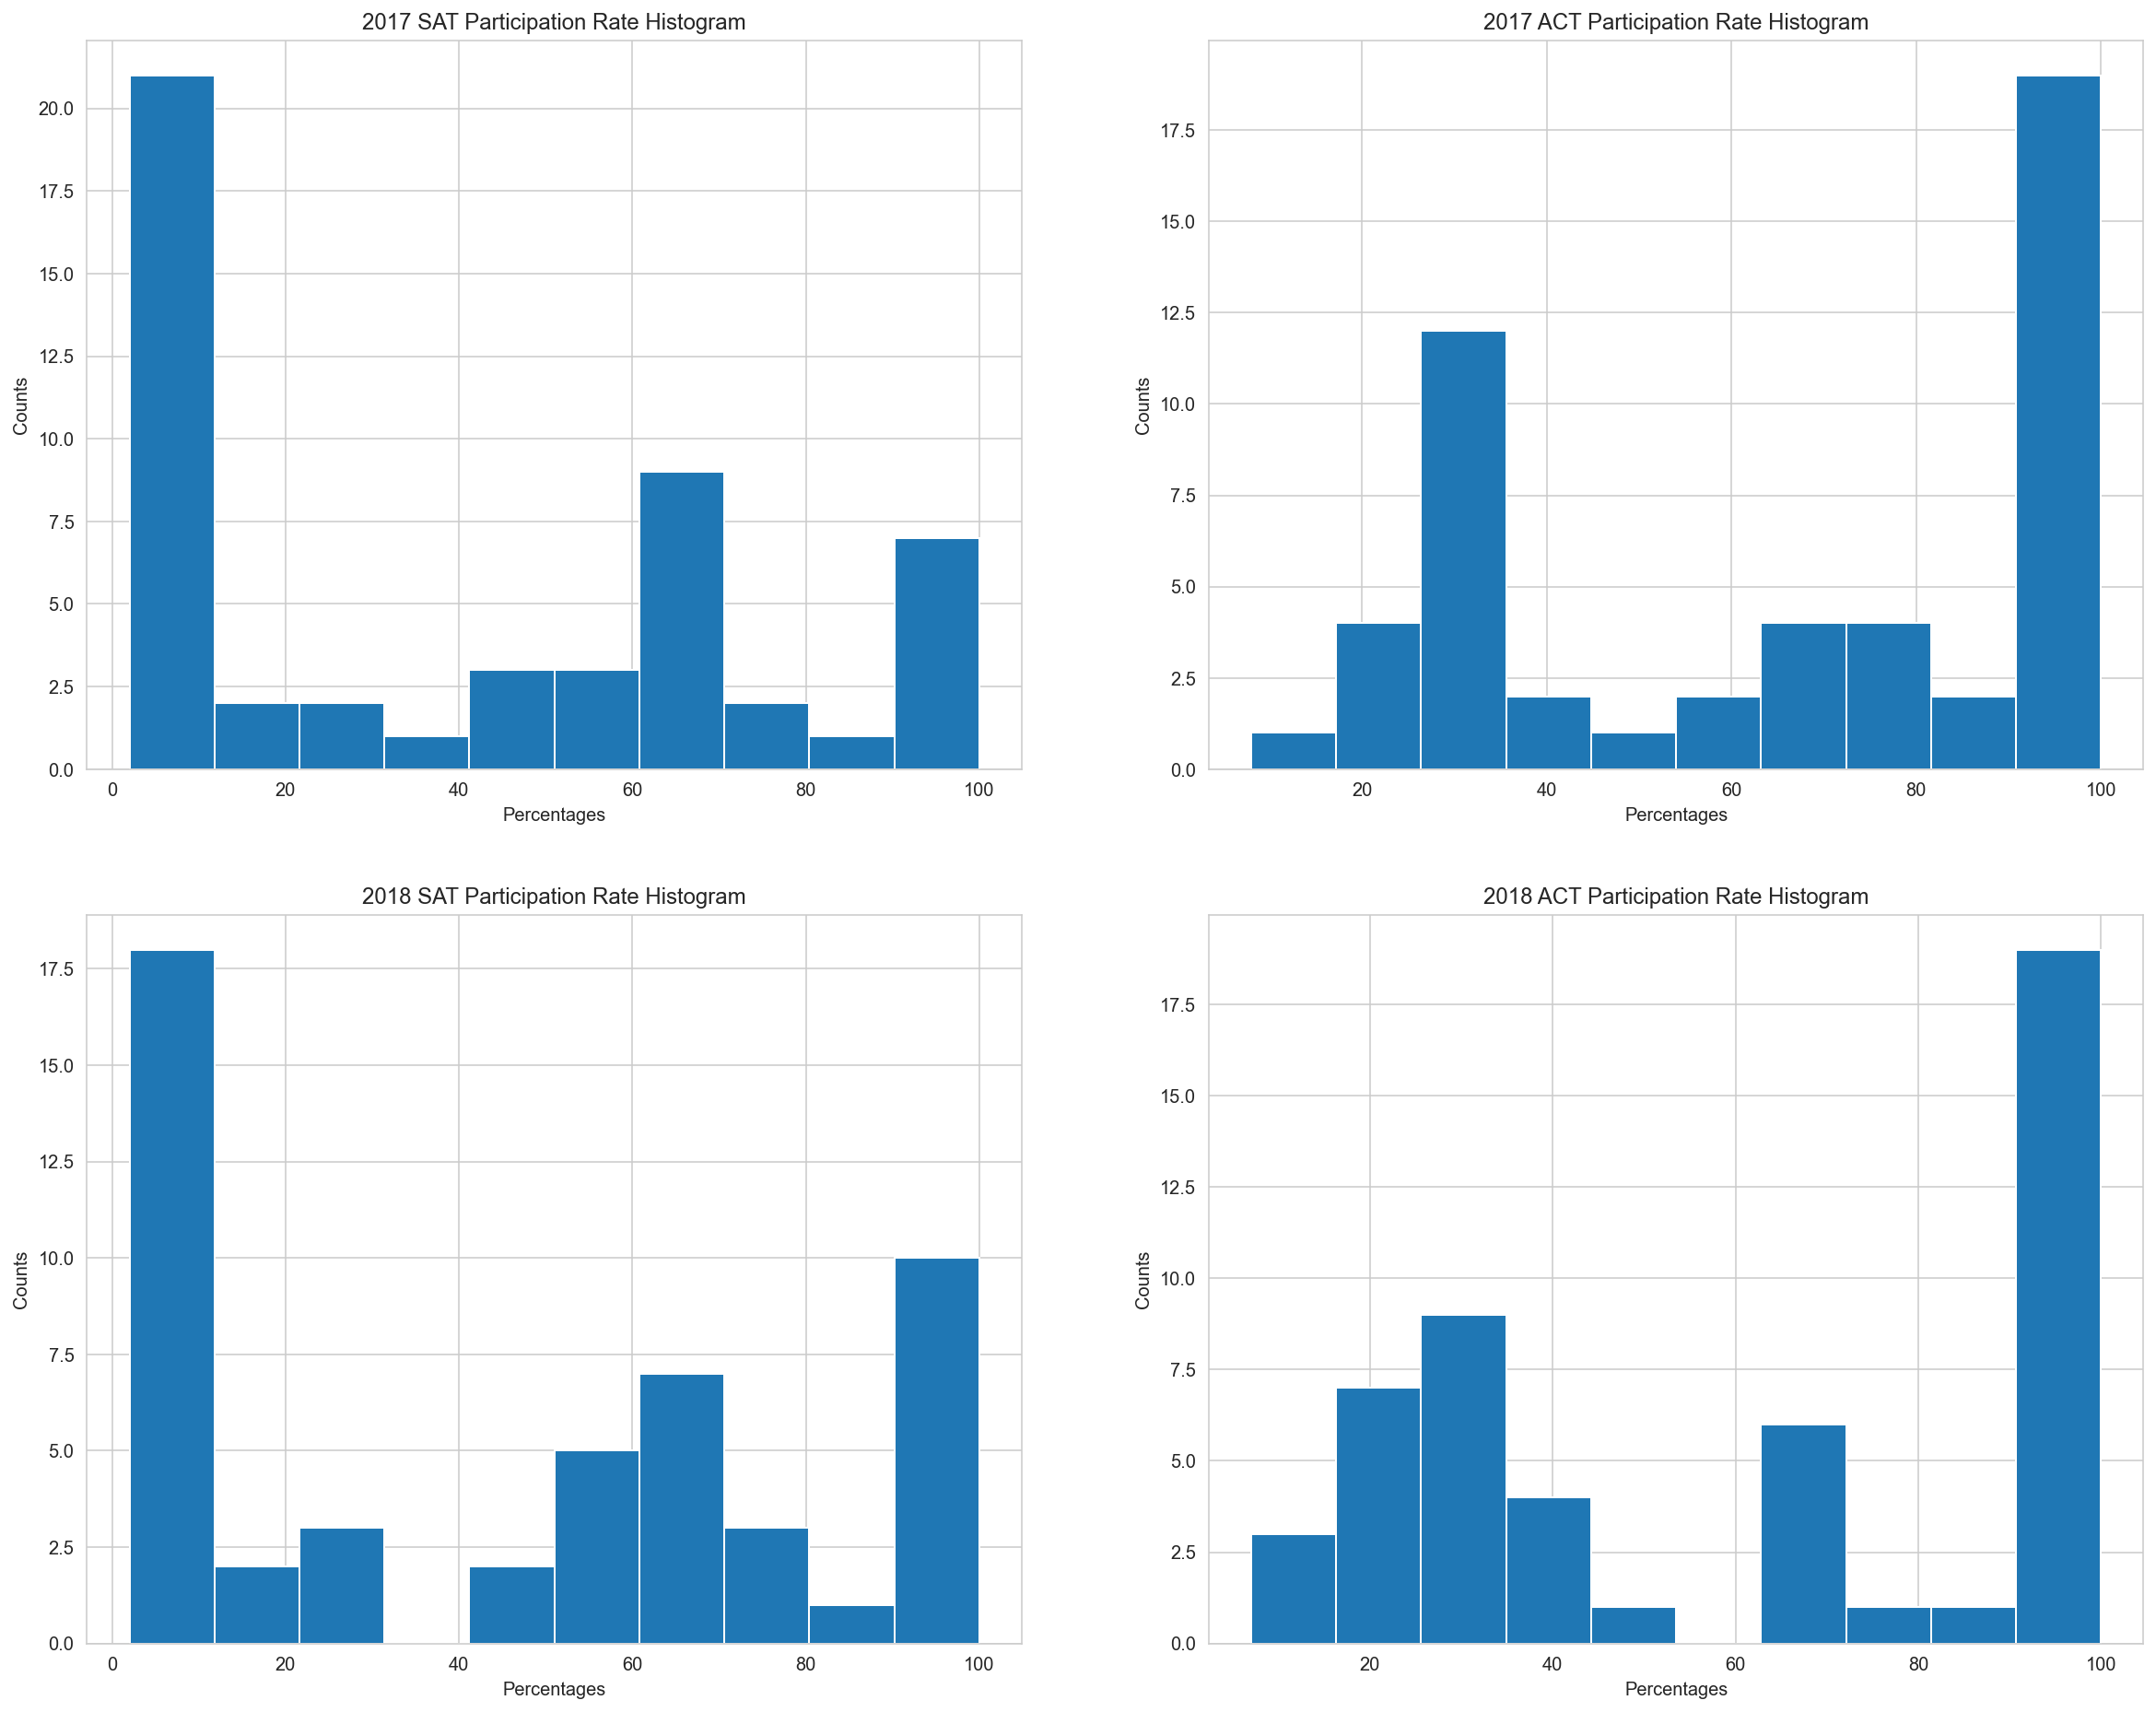

In [130]:
subplot_histograms(final,["sat_participation_percentage_2017","act_participation_percentage_2017","sat_participation_percentage_2018","act_participation_percentage_2018"],["2017 SAT Participation Rate Histogram","2017 ACT Participation Rate Histogram","2018 SAT Participation Rate Histogram","2018 ACT Participation Rate Histogram"],["Percentages","Percentages","Percentages","Percentages"])
#subplot histograms ACT vs SAT participation rate

For Math score, None of them are normally distributed as well

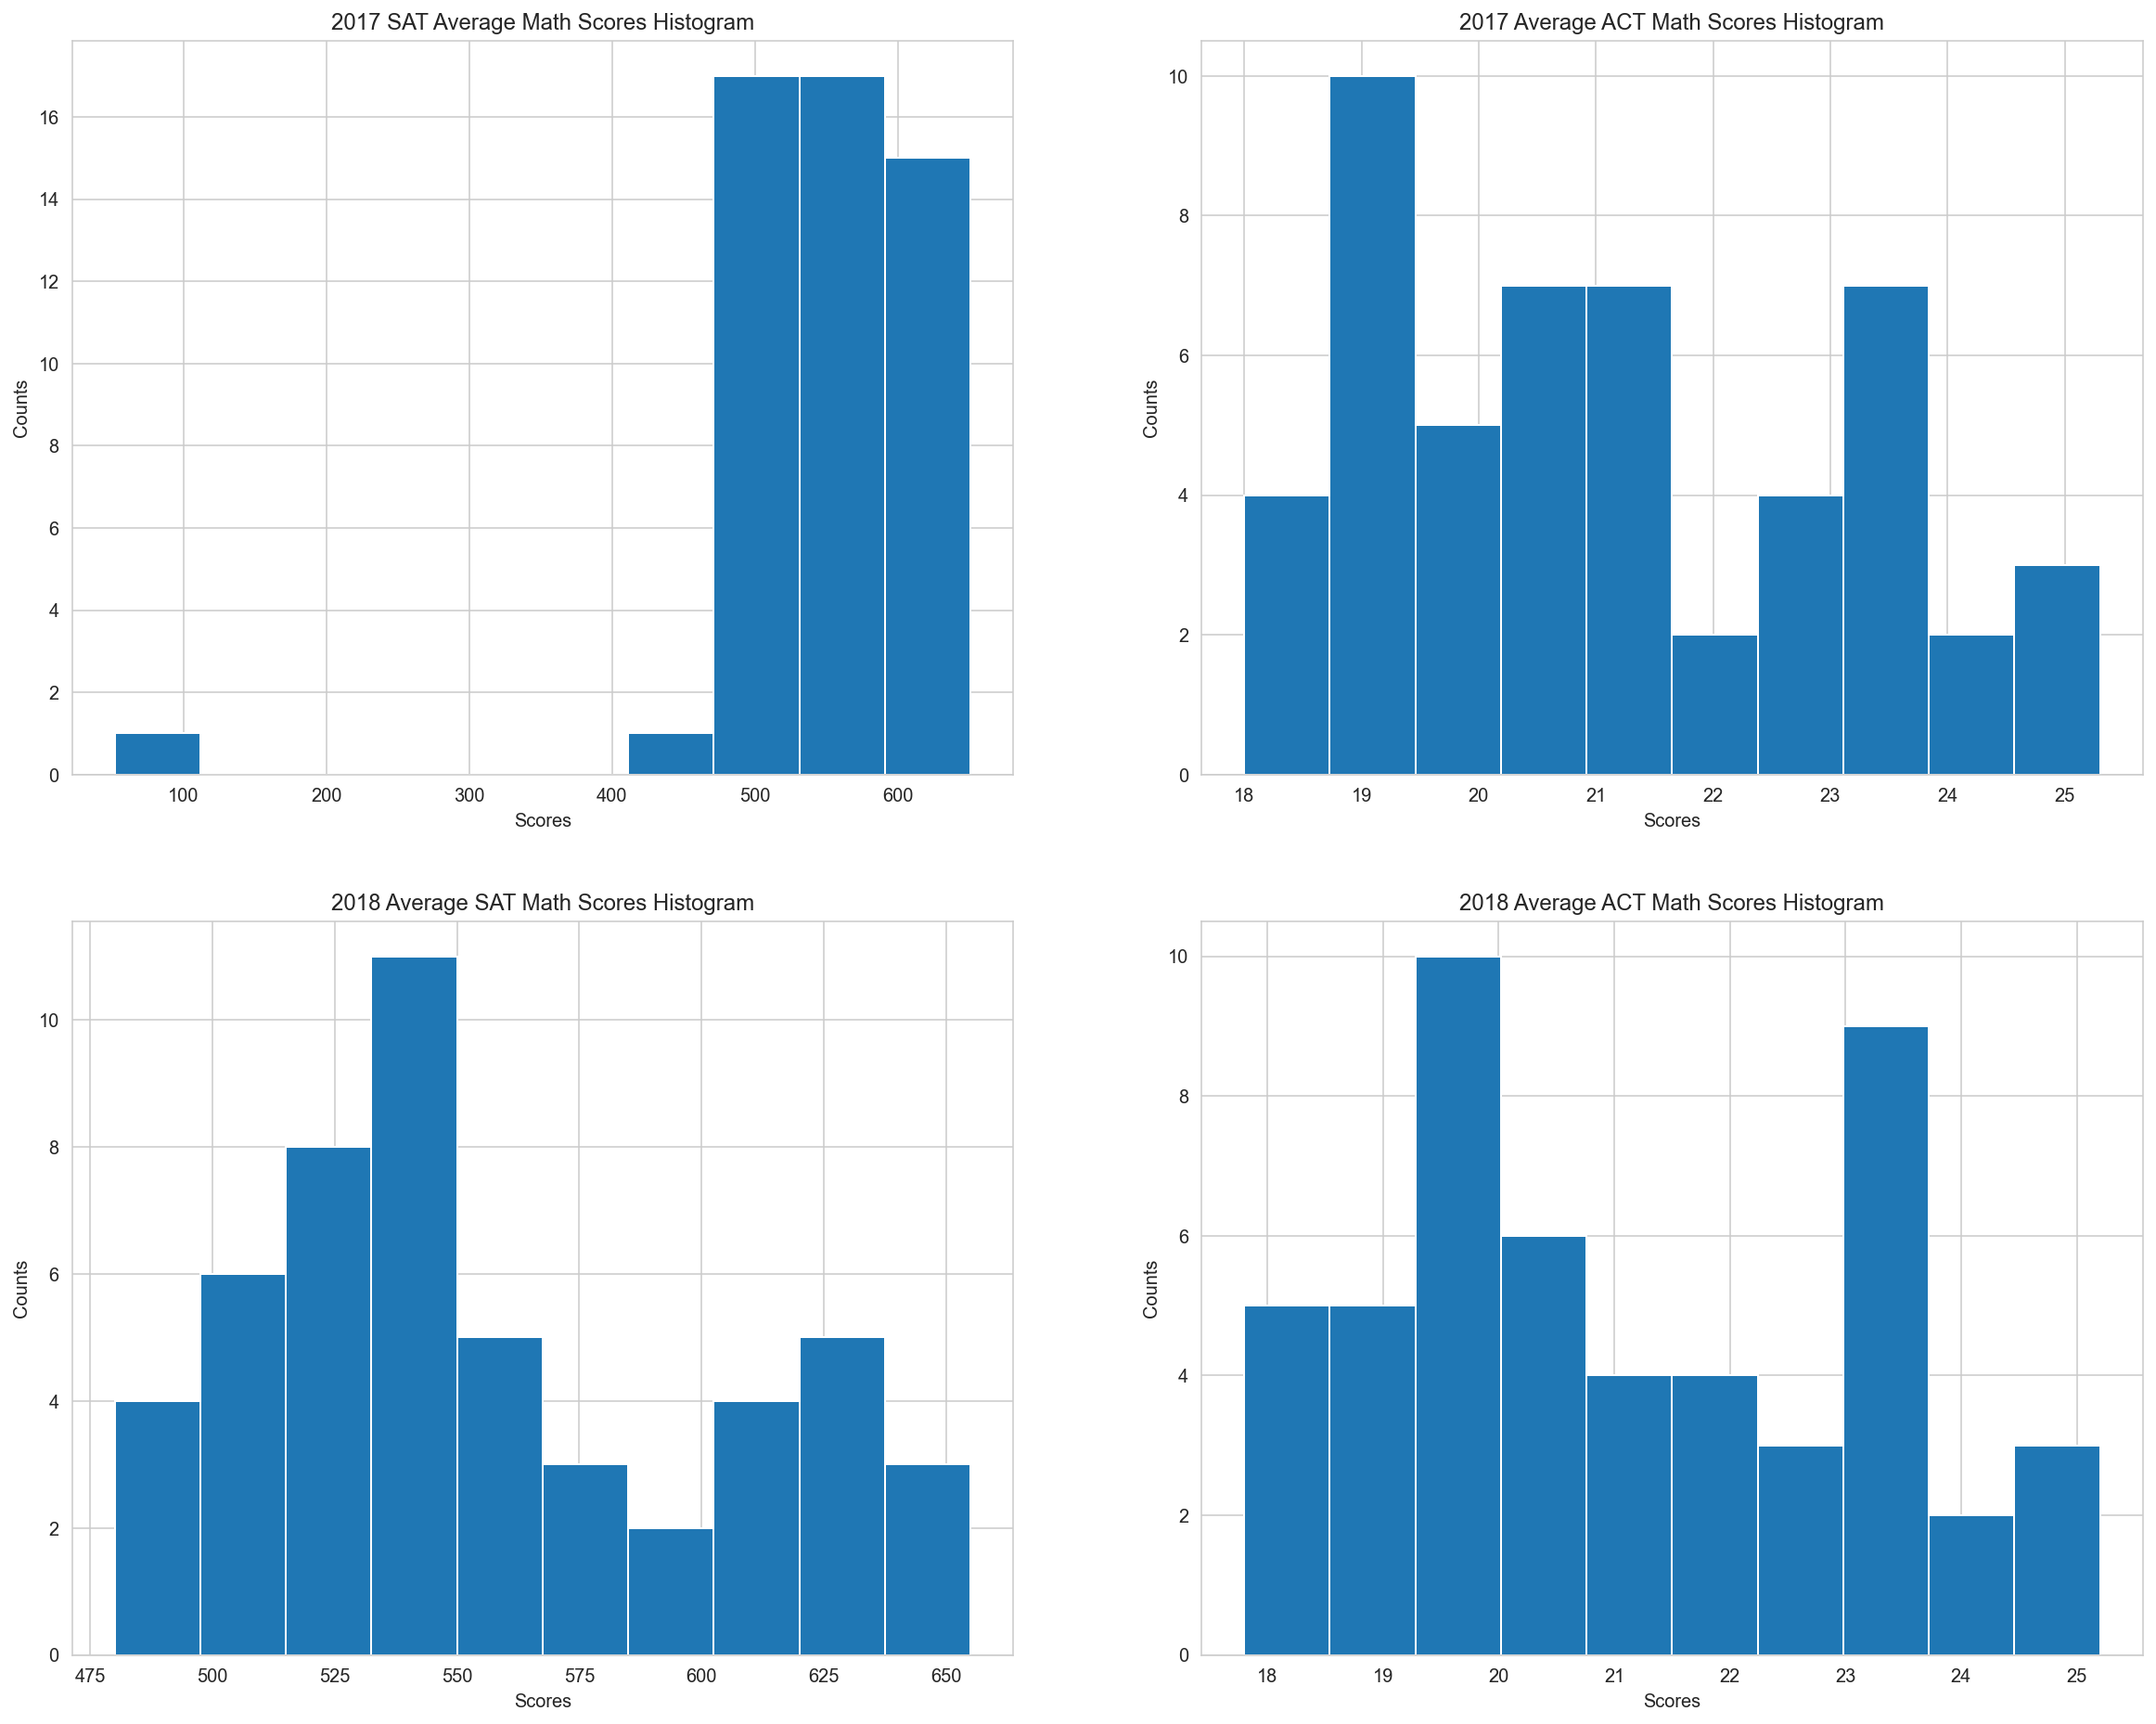

In [131]:
subplot_histograms(final,['sat_math_2017','act_math_2017','sat_math_2018','act_math_2018'],["2017 SAT Average Math Scores Histogram","2017 Average ACT Math Scores Histogram","2018 Average SAT Math Scores Histogram","2018 Average ACT Math Scores Histogram"],["Scores","Scores","Scores","Scores"])
#subplot histograms ACT vs SAT math score

For Reading scores, None of them are normally distributed.

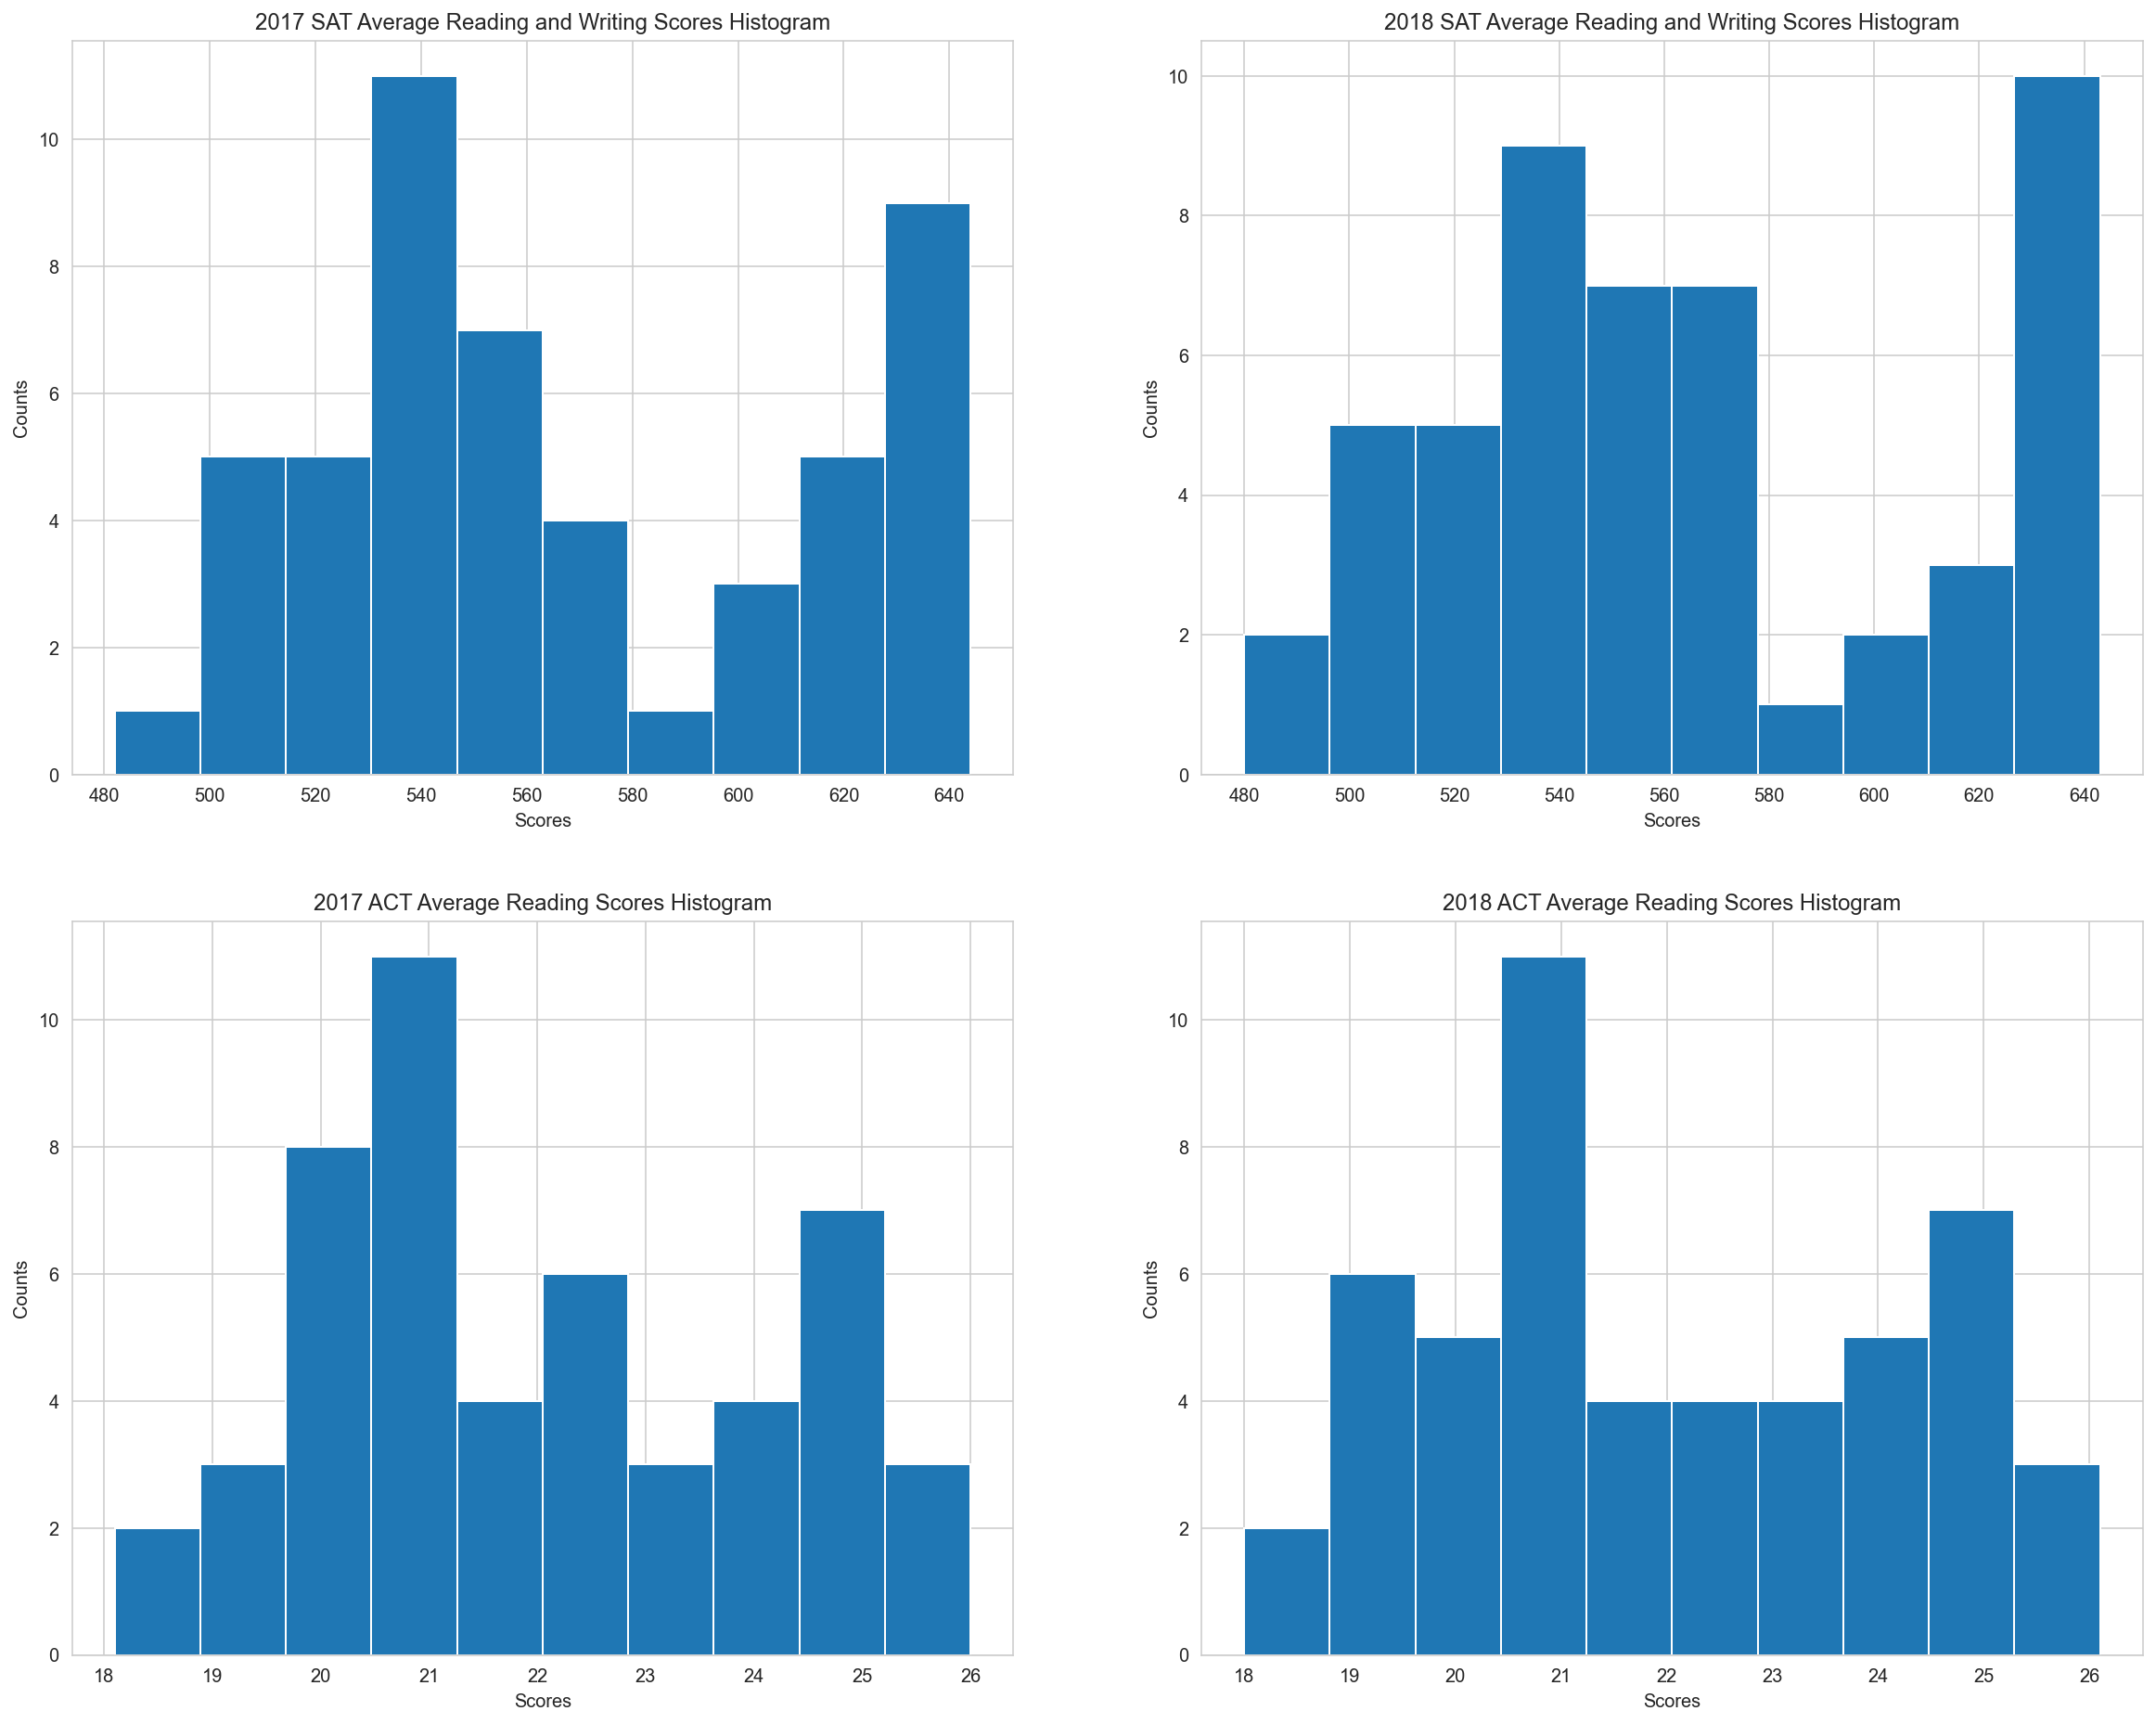

In [132]:
subplot_histograms(final,['sat_evidence_based_reading_and_Writing_2017','sat_evidence_based_reading_and_Writing_2018','act_reading_2017','act_reading_2018'],["2017 SAT Average Reading and Writing Scores Histogram","2018 SAT Average Reading and Writing Scores Histogram","2017 ACT Average Reading Scores Histogram","2018 ACT Average Reading Scores Histogram"],["Scores","Scores","Scores","Scores"])
#subplot histograms ACT vs SAT reading/writing scores

If our sample mean from a polulation is not normally distributed, then we cannot use inferential methods that rely on our mean of sampling distribution and standard deviation of sampling distribution, for example:
confidence Interval, z-score as well as t-test.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

 

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: Yes. It make sense to understand the relationship between SAT and ACT participation rates in 2017. as long as data is collected from a representative, randomly selected portion of the total population, a reasonably large sample size is used, and 
the standard deviations of samples are close to each other. t-two sample test may be suitable.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: No. the standard deviations between SAT math Score and ACT math score are far from each other. They are unpaired measurement with different measurement scales. 

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [133]:
t_stat, p_value = stats.ttest_ind(final["sat_math_2017"], final["sat_math_2018"], equal_var=False)
print(t_stat)
p_value

-0.6309654157924532


0.5298896626160714

In [134]:
t_stat, p_value = stats.ttest_ind(final["sat_participation_percentage_2017"], final["sat_participation_percentage_2018"], equal_var=False)
print(t_stat)
p_value

-0.8262650776952394


0.41062697785955005

In [135]:
t_stat, p_value = stats.ttest_ind(final["sat_participation_percentage_2017"], final["act_participation_percentage_2017"], equal_var=False)
print(t_stat)
p_value

-3.808577890817054


0.00024238408285306908

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

After a new format for the SAT was released in March 2016, some states like Illinois, Colorado show the sharp increment in SAT participation Rate from 2017 to 2018. State Carolina shows the increasing trend of taking both the ACT and SAT. There are 51 States in the United State, [each state has a Board of Education that is responsible for monitoring student scholastic achievement](https://mindfish.com/which-states-require-the-sat/). That means states policy for the testing system varies from state to state. some states only require SAT, some states only require ACT, some state require either of thems and some state policy varies from school distinct to school distinct. It seems to have a very complicated situation. However, the SAT participation rate highly depends on those policies, it will be a high SAT participation rate if the state only requires SAT and it will be the low SAT participation rate if ACT is in favor. Hence, our research is to identify the most important factors that would cause the rate increment from 2017 to 2018 since the new format SAT released. It would help to come out with a solution that could help to improve the competition situation in other states with a very low participation rate. 

Different States have different policies, location is a big matter. From the choropleth map we created earlier, we could notice a trend that states with more ACT participants normally located in the center part of United State; while the States with more SAT participants normally located at northeast and southwest part of United State. What is the reason for forming this trend?

Browse through the internet to search the locations of ACT inc offices and College Board offices: ACT Inc is located in [Iowa](https://en.wikipedia.org/wiki/ACT_(nonprofit_organization) state; College Board have the offices located In United State [NEW York, Virginia, Washington, Pennsylvania, Illinois, Massachusetts, Georgia, Florida, Texas, California](https://about.collegeboard.org/region-offices/west). Now, I am going to put above the offices' locations data into the dataframe and save it to the CSV file, and plot the graph with Tableau. 

In [136]:
act_location=["Iowa"] #creat a list for act office location
all_state1=final["state"]# extract the state from dataframe final
columns=["state","located"]#creat the columns list

In [137]:
act_office=pd.DataFrame(data=all_state1,columns=columns)#creat a data frame for act office
act_office['located'] = act_office['located'].replace(np.nan, 0, regex=True)#replace the Nan value with 0

In [138]:
act_office["located"].loc[act_office['state'].isin(act_location)]=1#replace the act office located state with 1

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [139]:
sat_location=["NeW York", "Virginia", "Washington", "Pennsylvania", "Illinois", "Massachusetts", "Georgia", "Florida", "Texas", "California"]
#set up a list contains all college board office locations

In [140]:
sat_office=pd.DataFrame(data=all_state1,columns=columns)# creat a dataframe contains all states in united state
sat_office['located'] = sat_office['located'].replace(np.nan, 0, regex=True)#replace the Nan value with 0

In [141]:
sat_office["located"].loc[sat_office['state'].isin(sat_location)]=1#replace all college board located state with 1

In [142]:
act_office.to_csv('data/act_office.csv', index=False)#save it to the CSV file

In [143]:
sat_office.to_csv('data/sat_office.csv', index=False)#save it to the CSV file

Now let import our saved CSV files which we just created into Tableau, Plot the graph

Let us import the graph for ACT office location

![ACT_Office](Picture/ACT_Office.png)

Let us import the graph for SAT office location

![SAT_Office](Picture/SAT_Office.png)

Now, Let us compare the 2017 and 2018 SAT/ACT participation Rate choropleth map we created earlier

![SAT_Participation_Rate_2017](Picture/SAT_Participation_Rate_2017.png)

![SAT_Participation_Rate_2018](Picture/SAT_Participation_Rate_2018.png)

![ACT_Participation_Rate_2017](Picture/ACT_Participation_Rate_2017.png)

![ACT_Participation_Rate_2018](Picture/ACT_Participation_Rate_2018.png)

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Surprisingly, we could find out college board offices located states, and some of their nearby states tend to have higher SAT participation Rates; and ACT inc located State and some of its nearby states trend to have low SAT participation Rates,but high ACT participation rate. Hence,  the higher the college board team local accessibility will generally result in the higher SAT participation Rate. Also, Most of the states show a high increment of SAT participation Rate from 2017 to 2018 after the new format of SAT release are the College Board team located states or their nearby states. The market accessibility is very important for the Participation Rate changes. 

To increase the SAT participation Rate in North Dakota, we need to understand the local market situation, local policy, closely work with local education firms. A local college board team in North Dakota or nearby North Dakota is necessary for this purpose. 

Further, we could analyze some additional data from state SAT participation rates by different years, consolidate with collage board offices launched years, to see how the Market accessibility will affect the local and their neighborhood participation rate.

## References

1. sat_2017.csv: https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/

2. act_2017.csv: https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows

3. act_2018_updated.csv: https://reports.collegeboard.org/sat-suite-program-results/state-results

4. sat_2018.csv: http://www.act.org/content/dam/act/unsecured/documents/cccr2018/Average-Scores-by-State.pdf 

5. https://blog.prepscholar.com/which-states-require-the-act-full-list-and-advice

6. https://mindfish.com/which-states-require-the-sat/

7. https://www.act.org/

8. https://about.collegeboard.org/region-offices/west